In [214]:
import pandas as pd 
import random 
import os

import matplotlib
import numpy as np

# Importing the necessary libraries without comments
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Setting up the plotting style and parameters without comments
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [215]:
sample_fraction = 1  #sample_fraction = 0.01 means that sampling 1% of the rows from the dataset.
random.seed(42)
def skip_row(row_idx):
    if row_idx == 0: 
        return False
    return random.random() > sample_fraction 

train_df = pd.read_csv(r'train.csv', parse_dates=['Order_Date'], skiprows=skip_row, dayfirst=True)





In [216]:
# Display the number of rows in the DataFrame
num_rows1 = len(train_df)
print("Number of rows of train:", num_rows1)

Number of rows of train: 45593


In [217]:
# Get the names of all columns for the training dataset
train_column_names = train_df.columns.tolist()



# Print the names of all columns for the training dataset
print("Names of all columns in the training dataset:")
for column_name in train_column_names:
    print(column_name)




Names of all columns in the training dataset:
ID
Delivery_person_ID
Delivery_person_Age
Delivery_person_Ratings
Restaurant_latitude
Restaurant_longitude
Delivery_location_latitude
Delivery_location_longitude
Order_Date
Time_Orderd
Time_Order_picked
Weatherconditions
Road_traffic_density
Vehicle_condition
Type_of_order
Type_of_vehicle
multiple_deliveries
Festival
City
Time_taken(min)


In [218]:
# Display the first few rows of the training
print("First few rows of training :")
train_df.head()

First few rows of training :


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [219]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  object        
 3   Delivery_person_Ratings      45593 non-null  object        
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [220]:
train_df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,1.023359
min,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,0.000000
25%,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,0.000000
50%,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2.000000
max,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,3.000000
std,8.185109,22.883647,7.335122,21.118812,NaN,0.839065


### Data Cleaning

In [221]:
train_df.duplicated().sum()

0

In [222]:
# Check for missing values in each column of the training DataFrame
missing_values = train_df.isnull().sum()


# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64


In [223]:
# Data Type Check
print("Data types of each column:")
print(train_df.dtypes)


Data types of each column:
ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                    object
Delivery_person_Ratings                object
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                    object
Festival                               object
City                                   object
Time_taken(min)                        object
dtype: object


In [224]:
#Summary Statistics for non-numerical columns
train_df.describe(exclude=np.number).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
ID,45593,45593,0x4607,1,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_ID,45593,1320,PUNERES01DEL01,67,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Age,45593,23,35,2262,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_person_Ratings,45593,29,4.8,7148,NaN,NaN,NaN,NaN,NaN,NaN
Order_Date,45593,NaN,NaN,NaN,2022-03-13 16:32:53.987235072,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00
Time_Orderd,45593,177,NaN,1731,NaN,NaN,NaN,NaN,NaN,NaN
Time_Order_picked,45593,193,21:30:00,496,NaN,NaN,NaN,NaN,NaN,NaN
Weatherconditions,45593,7,conditions Fog,7654,NaN,NaN,NaN,NaN,NaN,NaN
Road_traffic_density,45593,5,Low,15477,NaN,NaN,NaN,NaN,NaN,NaN
Type_of_order,45593,4,Snack,11533,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
# Change name Weatherconditions to Weather_conditions
train_df.rename(columns={'Weatherconditions': 'Weather_conditions'}, inplace=True)

def extract_column_value(df):
    # Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    # Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    # Extract city code from Delivery person ID
    df['City_code'] = df['Delivery_person_ID'].str.split("RES", expand=True)[0]

extract_column_value(train_df)
print(train_df[['Time_taken(min)', 'Weather_conditions', 'City_code']].head())

def update_datatype(df):
    # Update datatype from object to float
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Time_taken(min)'] = df['Time_taken(min)'].astype('float64')
    # Update datatype from object to datetime
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

update_datatype(train_df)


   Time_taken(min) Weather_conditions City_code
0               24              Sunny      INDO
1               33             Stormy      BANG
2               26         Sandstorms      BANG
3               21              Sunny     COIMB
4               30             Cloudy      CHEN


In [226]:
train_df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
#Check for Duplicate Values
if (len(train_df[train_df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [227]:
#Replace NaN to np.nan
train_df.replace('NaN', float(np.nan), regex=True,inplace=True)
#Show count of NaN values in data
train_df.isnull().sum().sort_values(ascending=False)





Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [228]:
train_df.head()
print("Data types of each column:")
print(train_df.dtypes)



Data types of each column:
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weather_conditions                     object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                   float64
Festival                               object
City                                   object
Time_taken(min)                       float64
City_code                              object
dtype: object


<Axes: xlabel='Time_taken(min)', ylabel='Count'>

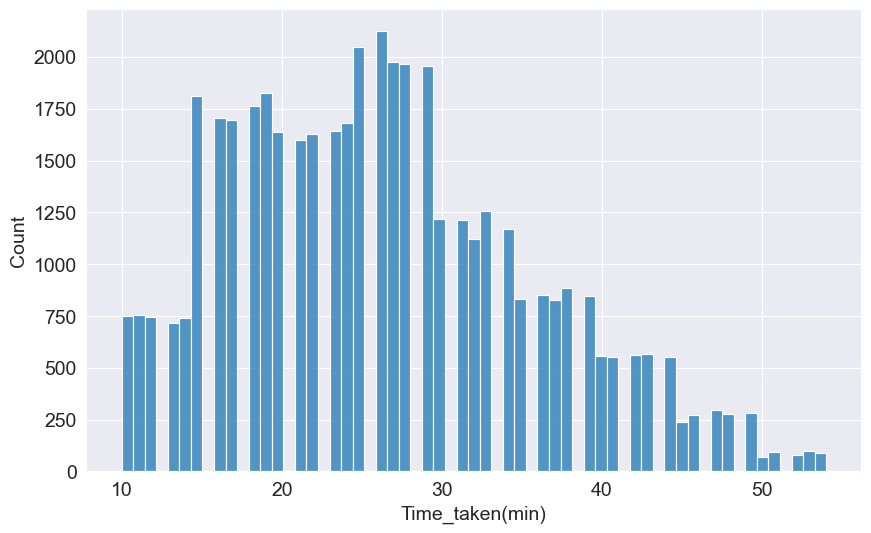

In [229]:
sns.histplot(data=train_df, x='Time_taken(min)')


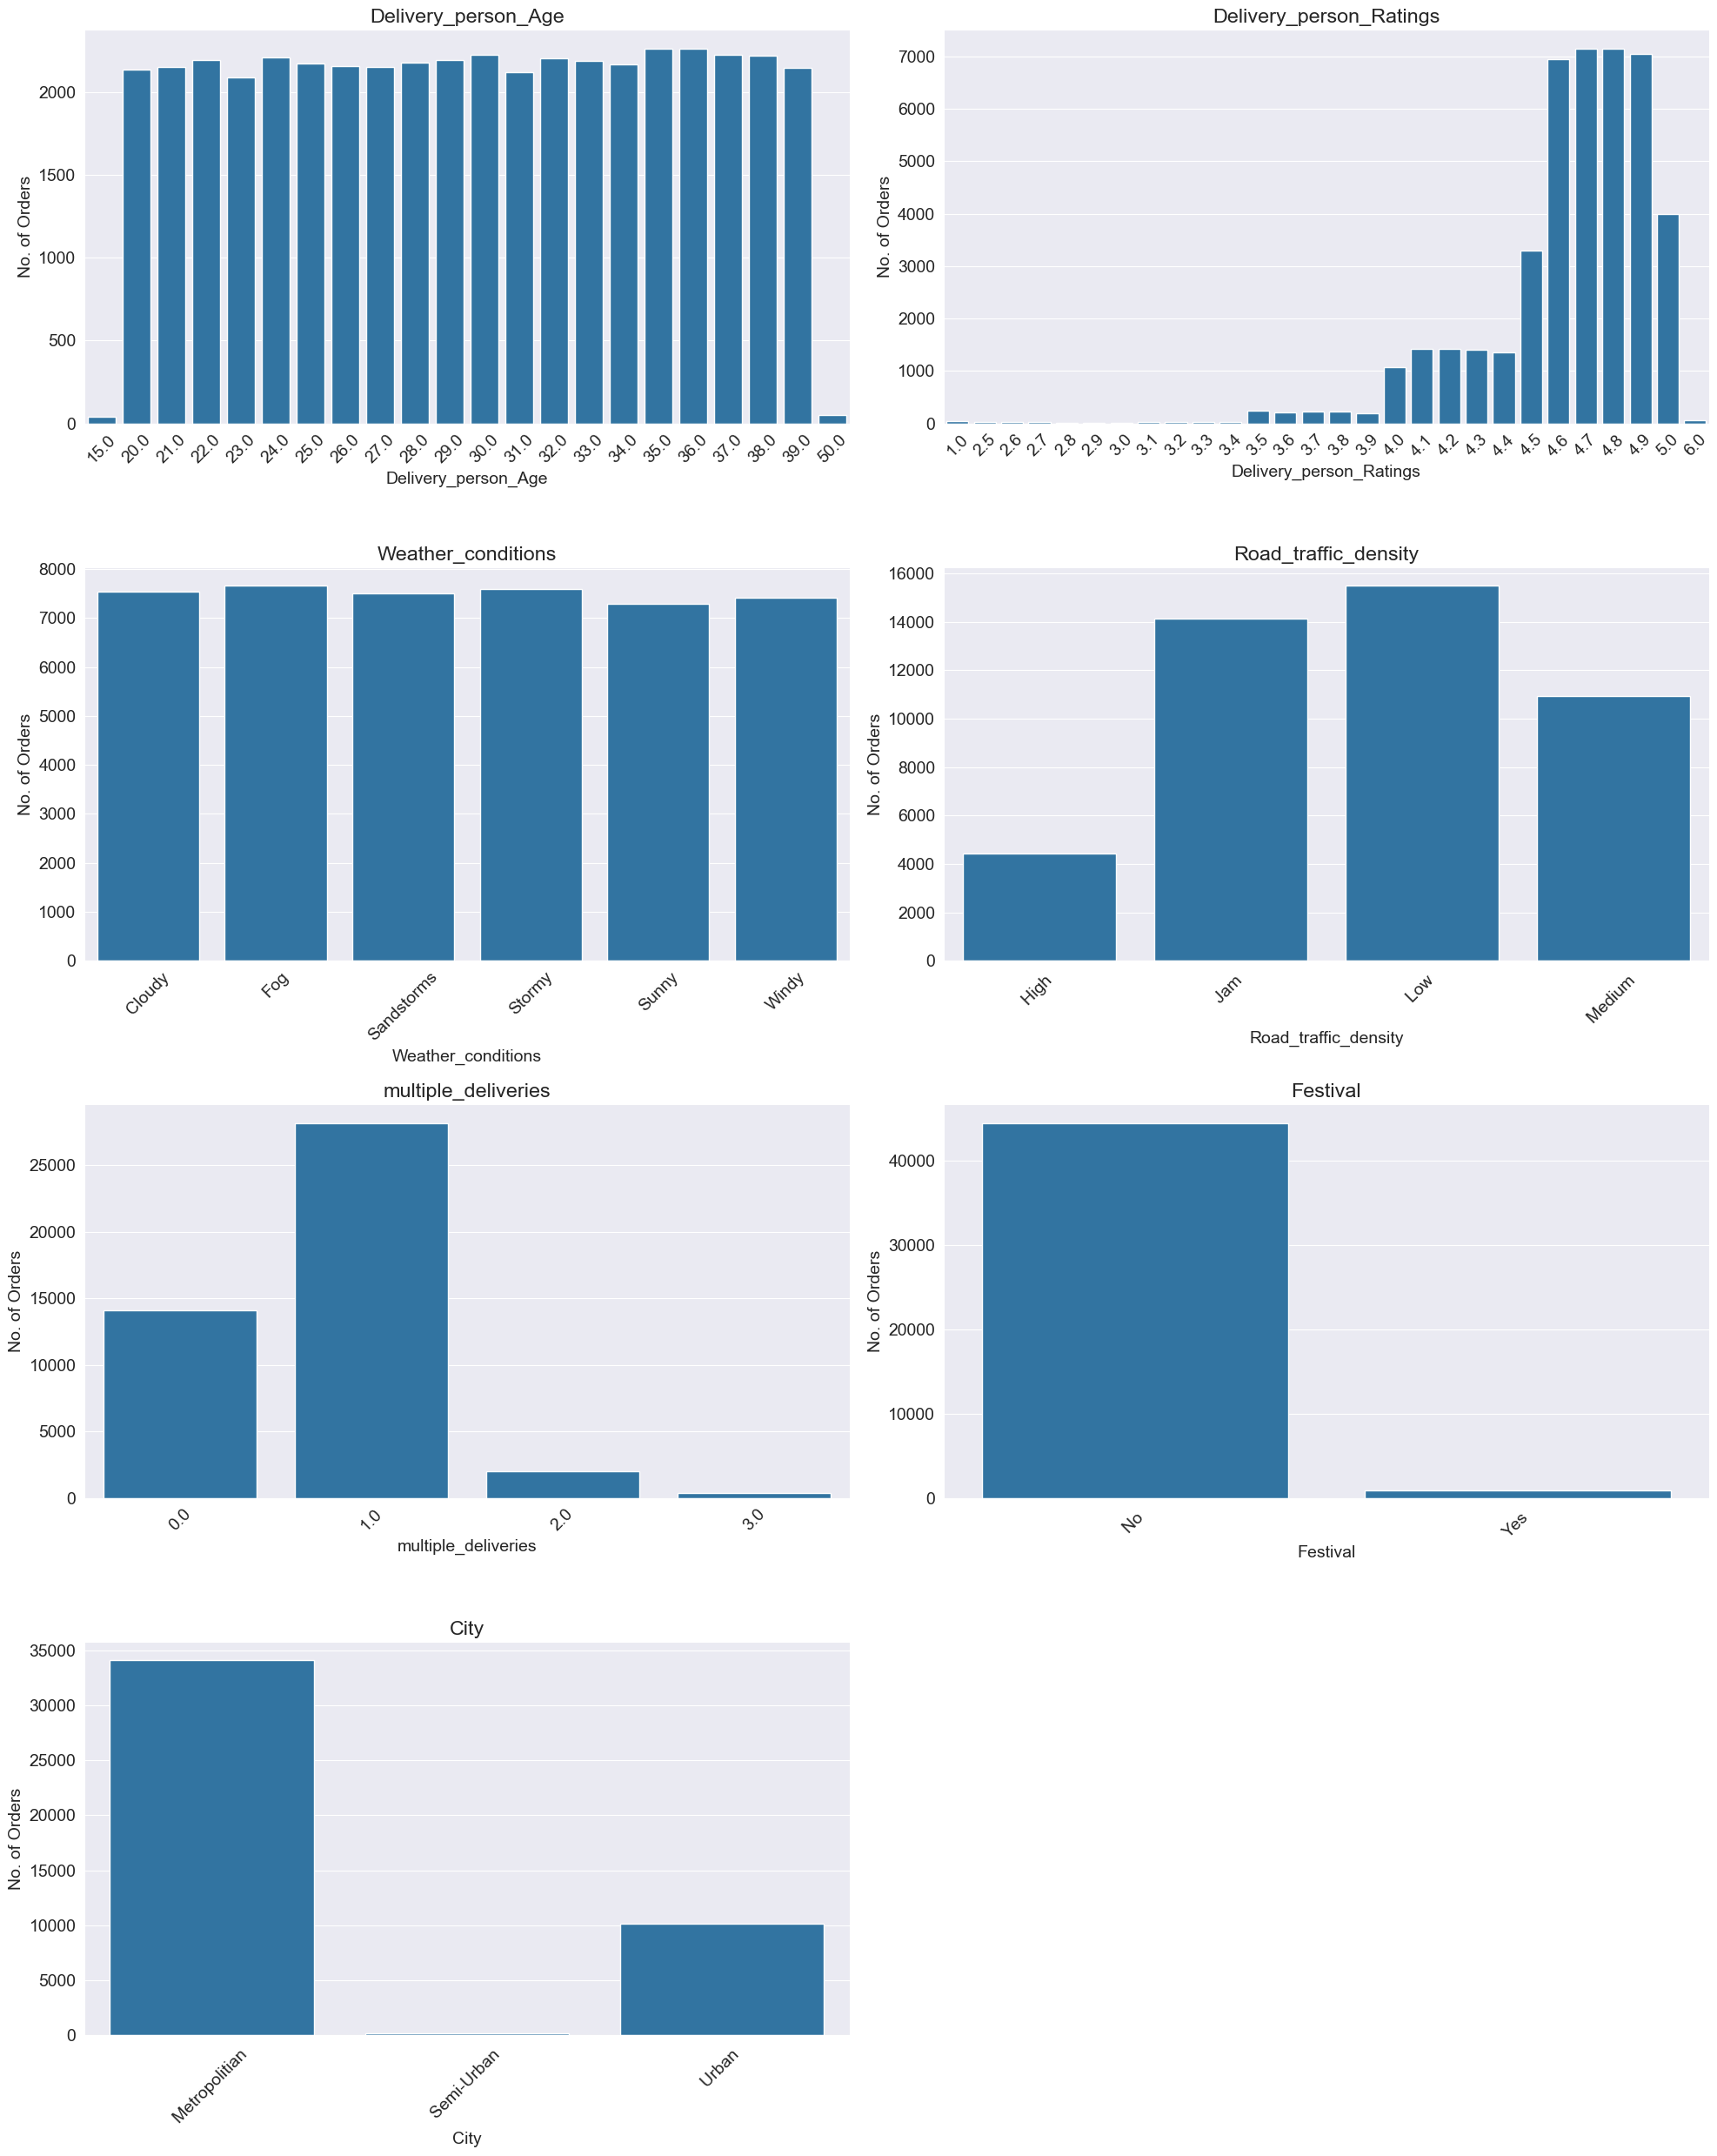

In [230]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns for visualization
visualization_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                         'Weather_conditions', 'Road_traffic_density', 
                         'multiple_deliveries', 'Festival', 'City']
num_plots = len(visualization_columns)
num_rows = (num_plots // 2) + (num_plots % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 25))

# Plot each column
for i, column_name in enumerate(visualization_columns):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=train_df, x=column_name, order=train_df[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


#### For Delivery_person_Age and Weather_conditions, which display nearly uniform distributions, the missing values will be filled randomly.
As for Delivery_person_Ratings, which exhibits a left-skewed distribution, the missing values will be filled with the median.
For the remaining categorical columns, the missing values will be filled with the mode, representing the most frequently occurring value in each respective column.

In [231]:
import numpy as np

def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age'].dropna()), inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions'].dropna()), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)

# Apply the function to handle null values
handle_null_values(train_df)

# Check for null values after handling
train_df.isnull().sum()


Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [232]:
##### Categorical Feature Encoding

from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(train_df)

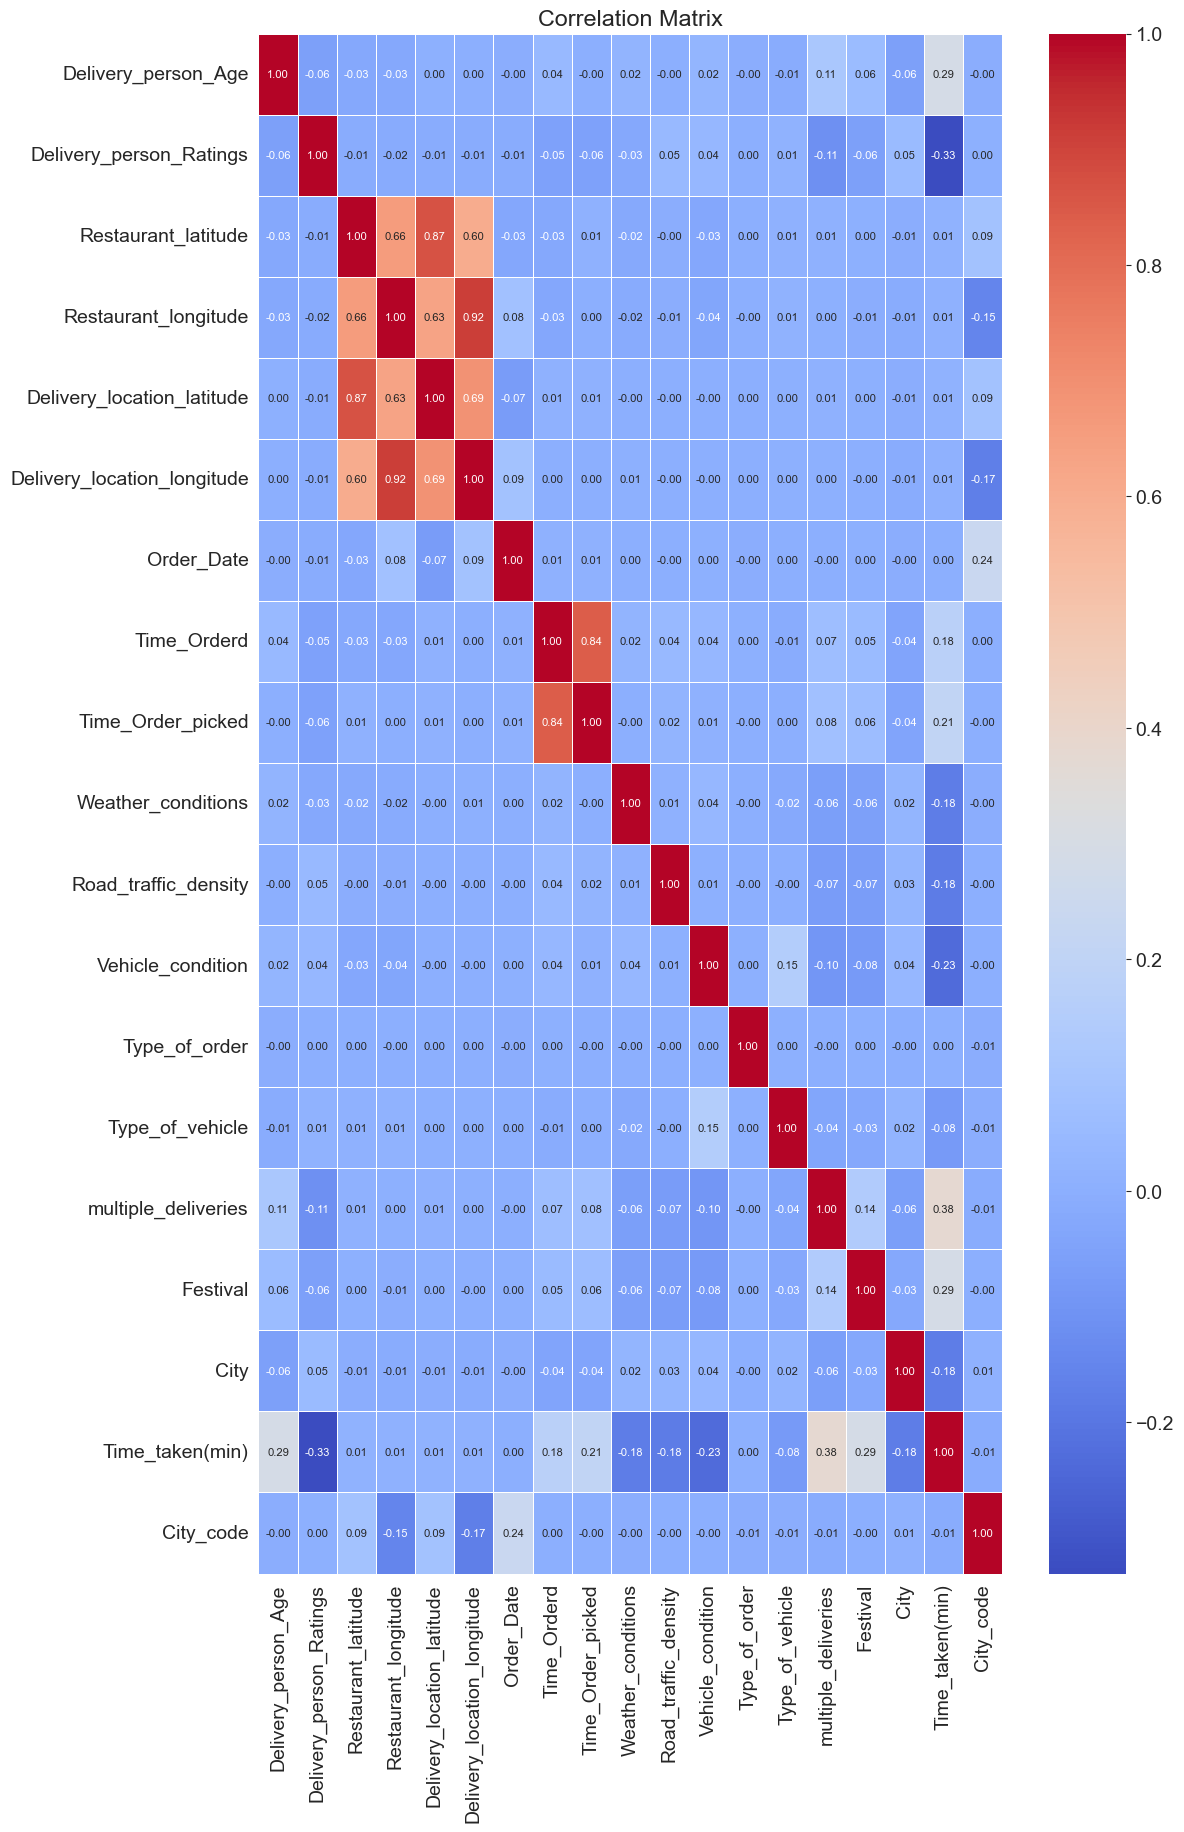

In [233]:

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"fontsize": 8})  # Adjust font size for clarity
plt.title('Correlation Matrix')
plt.show()


## Training

In [234]:
from sklearn.model_selection import train_test_split




# Split the data into features (X) and target variable (y)
X = train_df.drop(['Time_taken(min)', 'Order_Date'], axis=1)  # Features
y = train_df['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36474, 17)
Shape of X_test: (9119, 17)
Shape of y_train: (36474,)
Shape of y_test: (9119,)


In [236]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Original summary statistics for training data
original_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Original summary statistics for testing data
original_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Summary statistics for scaled training data
scaled_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Summary statistics for scaled testing data
scaled_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Display summary statistics before and after scaling
print("Original Summary Statistics for Training Data:")
original_summary_train




Original Summary Statistics for Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
count,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000
mean,29.804491,4.636914,17.041501,70.235085,17.486201,70.867861,111.761063,118.884329,2.516560,1.734852,1.024045,1.515929,2.246779,0.749383,0.019630,0.448456,12.058370
std,5.794815,0.328070,8.176420,22.893733,7.330215,21.067204,51.401341,56.983825,1.723271,0.933226,0.838474,1.120141,0.601767,0.566382,0.138728,0.831903,6.264574
min,15.000000,1.000000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,4.600000,12.933284,73.170000,12.989496,73.279083,86.000000,78.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,30.000000,4.700000,18.551440,75.897429,18.636947,75.996959,125.000000,135.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,11.000000
75%,35.000000,4.800000,22.728163,78.044095,22.785747,78.101592,152.000000,164.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,18.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,176.000000,192.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,21.000000


In [237]:
print("\nSummary Statistics for Scaled Training Data:")
scaled_summary_train



Summary Statistics for Scaled Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
count,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04
mean,-2.337696e-17,5.236439e-16,1.511710e-16,5.513067e-16,-2.345488e-16,-3.549402e-16,-5.474105e-17,1.139627e-16,9.730660e-17,6.194895e-17,1.546776e-16,5.922164e-17,-2.579258e-16,2.376658e-17,-2.396139e-17,5.649432e-17,3.282515e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.554818e+00,-1.108595e+01,-5.864146e+00,-6.927230e+00,-2.384165e+00,-3.363466e+00,-2.174313e+00,-2.086311e+00,-1.460359e+00,-1.859009e+00,-1.221336e+00,-1.353356e+00,-3.733684e+00,-1.323124e+00,-1.415044e-01,-5.390804e-01,-1.924877e+00
25%,-8.291131e-01,-1.125202e-01,-5.024537e-01,1.281990e-01,-6.134562e-01,1.144554e-01,-5.011818e-01,-7.174824e-01,-8.800593e-01,-7.874427e-01,-1.221336e+00,-4.605994e-01,-4.100952e-01,-1.323124e+00,-1.415044e-01,-5.390804e-01,-9.670974e-01
50%,3.373910e-02,1.922972e-01,1.846725e-01,2.473350e-01,1.569889e-01,2.434670e-01,2.575637e-01,2.828152e-01,2.805403e-01,2.841233e-01,-2.867693e-02,4.321577e-01,-4.100952e-01,4.424936e-01,-1.415044e-01,-5.390804e-01,-1.689476e-01
75%,8.965913e-01,4.971147e-01,6.955049e-01,3.411028e-01,7.229827e-01,3.433693e-01,7.828490e-01,7.917385e-01,8.608401e-01,2.841233e-01,1.163983e+00,1.324915e+00,1.251699e+00,4.424936e-01,-1.415044e-01,-5.390804e-01,9.484621e-01
max,3.485148e+00,4.154924e+00,1.696677e+00,7.949169e-01,1.850975e+00,8.399707e-01,1.249769e+00,1.283113e+00,1.441140e+00,1.355689e+00,2.356642e+00,1.324915e+00,1.251699e+00,3.973729e+00,7.066919e+00,1.865079e+00,1.427352e+00


# MODEL

#### Baseline (predicts mean)

In [238]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean of the target column
mean_target = y_train.mean()

# Predict using the mean value for all test samples
y_pred_baseline = np.full_like(y_test, mean_target)

# Calculate RMSE
rmse_baseline = sqrt(mean_squared_error(y_test, y_pred_baseline))


print(f"Mean of the target column: {mean_target}")
print(f"RMSE for baseline model: {rmse_baseline}")


Mean of the target column: 26.30161210725448
RMSE for baseline model: 9.363725943211962


In [239]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R^2 score for baseline model: {r2_baseline}")


R^2 score for baseline model: -1.3992208637070291e-05


### Linear Regression

In [240]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate RMSE
rmse_linear_reg = sqrt(mean_squared_error(y_test, y_pred_linear_reg))

# Calculate R-squared
r_squared_linear_reg = linear_reg_model.score(X_test, y_test)


print(f"RMSE for Linear Regression model: {rmse_linear_reg}")
print(f"R^2 score for Linear Regression model: {r_squared_linear_reg}")


RMSE for Linear Regression model: 6.968401493070962
R^2 score for Linear Regression model: 0.4461718601658642


### DECISION TREE

Max Depth: 3, RMSE: 7.297670554942055, R^2: 0.39259663223459174
Max Depth: 5, RMSE: 6.38206417596573, R^2: 0.5354515428158417
Max Depth: 7, RMSE: 5.615971968319597, R^2: 0.6402849977696645
Max Depth: 10, RMSE: 5.061815552834446, R^2: 0.7077723404391085
Max Depth: None, RMSE: 6.455895226688553, R^2: 0.5246410937438374


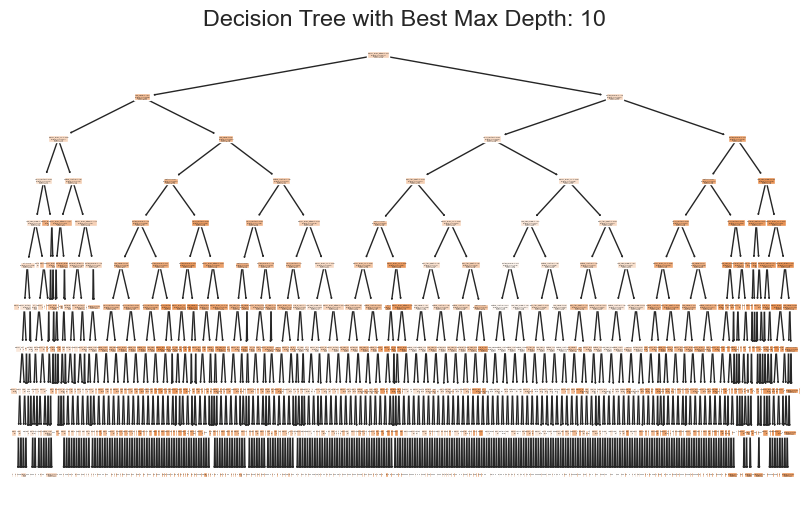

In [241]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
max_depth_values = [3, 5, 7, 10, None]

# Initialize lists to store RMSE and R-squared values for each depth
rmse_values = []
r_squared_values = []

for max_depth in max_depth_values:
    # Create a Decision Tree regression model with the current max_depth
    tree_reg_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    tree_reg_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_tree = tree_reg_model.predict(X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
    rmse_values.append(rmse)
    
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred_tree)
    r_squared_values.append(r_squared)
    
    print(f"Max Depth: {max_depth}, RMSE: {rmse}, R^2: {r_squared}")

# Find the index of the minimum RMSE value
best_index = rmse_values.index(min(rmse_values))

# Use the best index to get the corresponding max_depth value
best_max_depth = max_depth_values[best_index]

# Create and plot the decision tree for the best max_depth value
best_tree_reg_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_tree_reg_model.fit(X_train, y_train)

plot_tree(best_tree_reg_model, filled=True, feature_names=X.columns)
plt.title(f"Decision Tree with Best Max Depth: {best_max_depth}")
plt.show()


### XGB REGRESSOR 

In [242]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb_original = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb_original = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (Original Dataset): {rmse_xgb_original}")
print(f"R^2 score for XGBRegressor model (Original Dataset): {r_squared_xgb_original}")


RMSE for XGBRegressor model (Original Dataset): 4.429008079650885
R^2 score for XGBRegressor model (Original Dataset): 0.7762713339781808


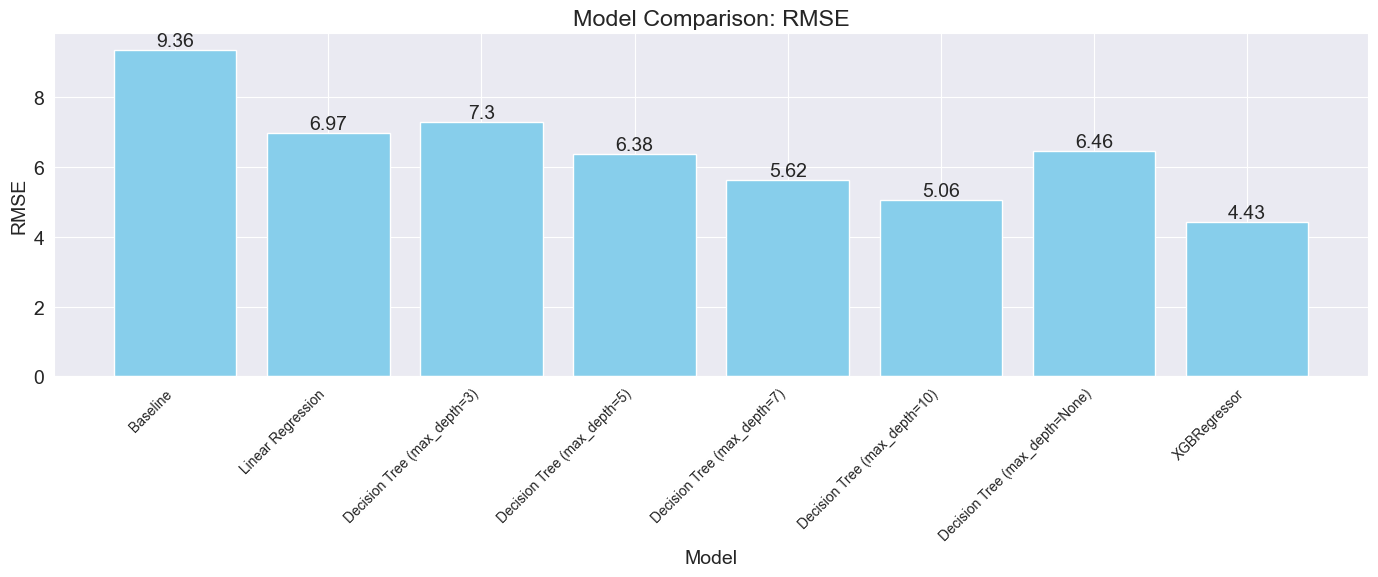

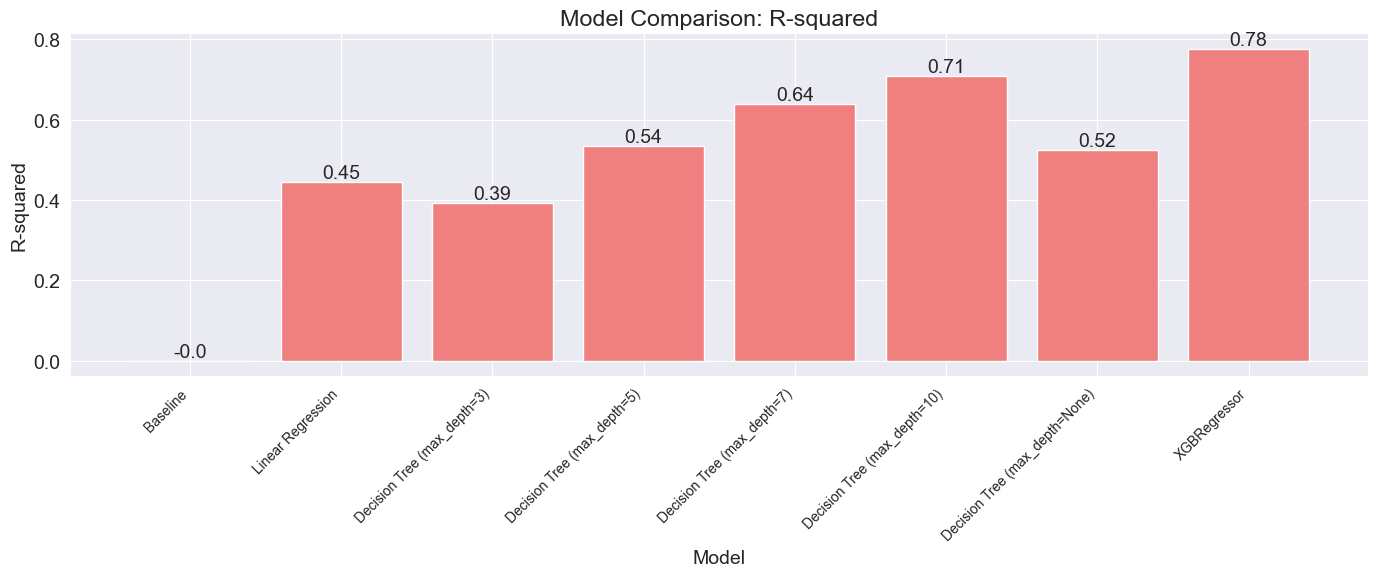

In [243]:
# Append the results for XGBRegressor
model_names = ['Baseline', 'Linear Regression'] + [f'Decision Tree (max_depth={depth})' for depth in max_depth_values] + ['XGBRegressor']
rmse_values = [rmse_baseline, rmse_linear_reg] + rmse_values + [rmse_xgb_original]
r_squared_values = [r2_baseline, r_squared_linear_reg] + r_squared_values + [r_squared_xgb_original]

# Ensure that lengths of all lists match
assert len(model_names) == len(rmse_values) == len(r_squared_values), "Length mismatch between model names and values."

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting the R-squared comparison
plt.figure(figsize=(14, 6))
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Feature Engineering (order_prepare_time)

In [244]:
train_df_1=train_df.copy()

def calculate_time_diff(df):
    """
    Calculates the time difference between order and pick-up times, and handles null values.
    
    Parameters:
    - df (DataFrame): DataFrame containing columns 'Time_Orderd', 'Time_Order_picked', and 'Order_Date'.
    
    Returns:
    None (Modifies the DataFrame in place by adding a new column 'order_prepare_time' and dropping irrelevant columns).
    """
    # Convert 'Time_Orderd' and 'Time_Order_picked' to timedelta data type
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Calculate the time difference in minutes
    df['order_prepare_time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time related columns
    df.drop(['Time_Orderd', 'Time_Order_picked','Order_Date'], axis=1, inplace=True)

# Call the function to calculate time differences and handle null values for the DataFrame 'df_train'
calculate_time_diff(train_df_1)



In [245]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  float64
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weather_conditions           45593 non-null  int32  
 7   Road_traffic_density         45593 non-null  int32  
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  int32  
 10  Type_of_vehicle              45593 non-null  int32  
 11  multiple_deliveries          45593 non-null  float64
 12  Festival                     45593 non-null  int32  
 13  City            

In [246]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(train_df_1)

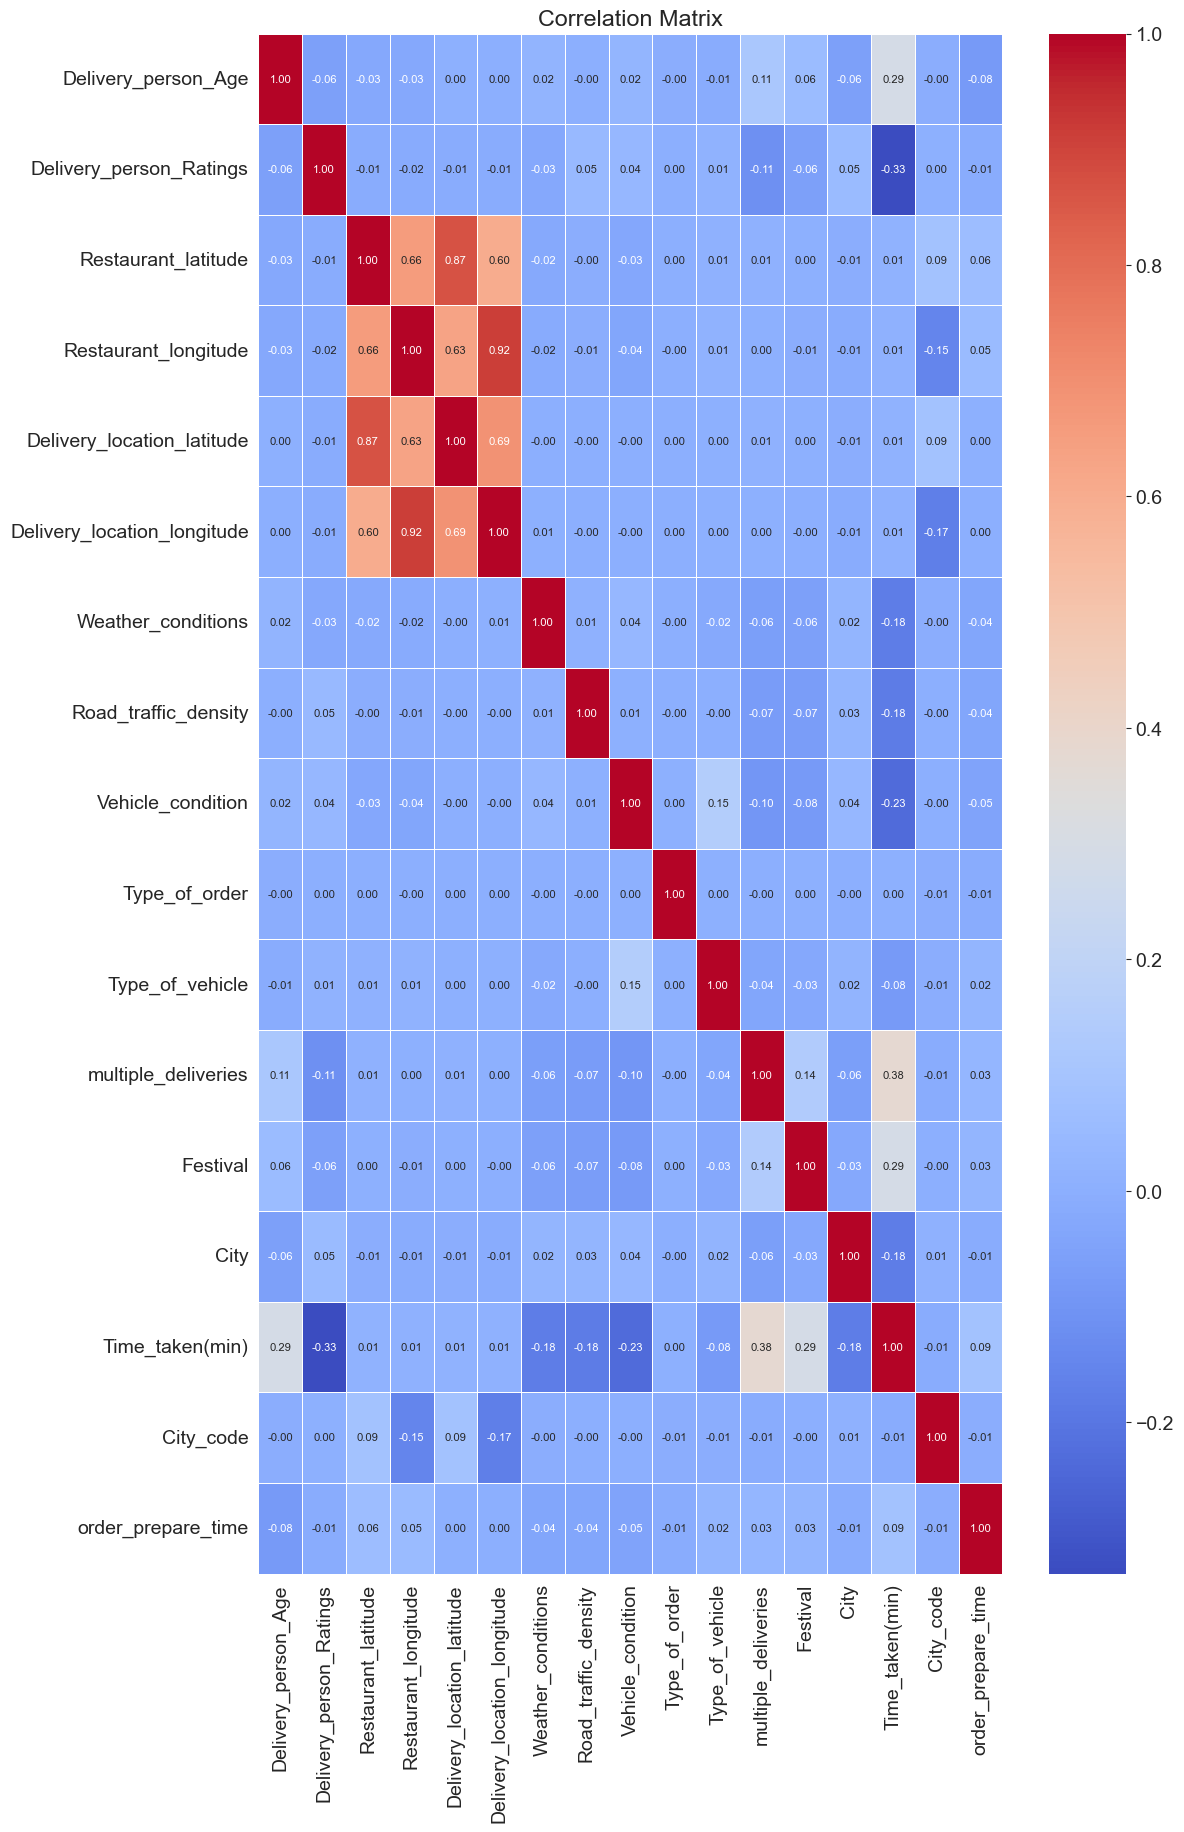

In [247]:
# Calculate the correlation matrix
correlation_matrix = train_df_1.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"fontsize": 8})  # Adjust font size for clarity
plt.title('Correlation Matrix')
plt.show()


In [248]:

#Training

from sklearn.model_selection import train_test_split




# Split the data into features (X) and target variable (y)
X = train_df_1.drop('Time_taken(min)', axis=1)  # Features
y = train_df_1['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [249]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36474, 16)
Shape of X_test: (9119, 16)
Shape of y_train: (36474,)
Shape of y_test: (9119,)


In [250]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Original summary statistics for training data
original_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Original summary statistics for testing data
original_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Summary statistics for scaled training data
scaled_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Summary statistics for scaled testing data
scaled_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Display summary statistics before and after scaling
print("Original Summary Statistics for Training Data:")
original_summary_train





Original Summary Statistics for Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,order_prepare_time
count,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,3.647400e+04
mean,29.804491,4.636914,17.041501,70.235085,17.486201,70.867861,2.516560,1.734852,1.024045,1.515929,2.246779,0.749383,0.019630,0.448456,12.058370,1.187211e-10
std,5.794815,0.328070,8.176420,22.893733,7.330215,21.067204,1.723271,0.933226,0.838474,1.120141,0.601767,0.566382,0.138728,0.831903,6.264574,5.119005e-10
min,15.000000,1.000000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.933333e-09
25%,25.000000,4.600000,12.933284,73.170000,12.989496,73.279083,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,1.333333e-10
50%,30.000000,4.700000,18.551440,75.897429,18.636947,75.996959,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,11.000000,2.333333e-10
75%,35.000000,4.800000,22.728163,78.044095,22.785747,78.101592,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,18.000000,2.833333e-10
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,21.000000,3.333333e-10


In [251]:
print("\nSummary Statistics for Scaled Training Data:")
scaled_summary_train


Summary Statistics for Scaled Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,order_prepare_time
count,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04
mean,-2.337696e-17,5.236439e-16,1.511710e-16,5.513067e-16,-2.345488e-16,-3.549402e-16,9.730660e-17,6.194895e-17,1.546776e-16,5.922164e-17,-2.579258e-16,2.376658e-17,-2.396139e-17,5.649432e-17,3.282515e-17,-1.811714e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.554818e+00,-1.108595e+01,-5.864146e+00,-6.927230e+00,-2.384165e+00,-3.363466e+00,-1.460359e+00,-1.859009e+00,-1.221336e+00,-1.353356e+00,-3.733684e+00,-1.323124e+00,-1.415044e-01,-5.390804e-01,-1.924877e+00,-5.962284e+00
25%,-8.291131e-01,-1.125202e-01,-5.024537e-01,1.281990e-01,-6.134562e-01,1.144554e-01,-8.800593e-01,-7.874427e-01,-1.221336e+00,-4.605994e-01,-4.100952e-01,-1.323124e+00,-1.415044e-01,-5.390804e-01,-9.670974e-01,2.854546e-02
50%,3.373910e-02,1.922972e-01,1.846725e-01,2.473350e-01,1.569889e-01,2.434670e-01,2.805403e-01,2.841233e-01,-2.867693e-02,4.321577e-01,-4.100952e-01,4.424936e-01,-1.415044e-01,-5.390804e-01,-1.689476e-01,2.238986e-01
75%,8.965913e-01,4.971147e-01,6.955049e-01,3.411028e-01,7.229827e-01,3.433693e-01,8.608401e-01,2.841233e-01,1.163983e+00,1.324915e+00,1.251699e+00,4.424936e-01,-1.415044e-01,-5.390804e-01,9.484621e-01,3.215751e-01
max,3.485148e+00,4.154924e+00,1.696677e+00,7.949169e-01,1.850975e+00,8.399707e-01,1.441140e+00,1.355689e+00,2.356642e+00,1.324915e+00,1.251699e+00,3.973729e+00,7.066919e+00,1.865079e+00,1.427352e+00,4.192517e-01


In [252]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean of the target column
mean_target = y_train.mean()

# Predict using the mean value for all test samples
y_pred_baseline = np.full_like(y_test, mean_target)

# Calculate RMSE
rmse_baseline = sqrt(mean_squared_error(y_test, y_pred_baseline))


print(f"Mean of the target column: {mean_target}")
print(f"RMSE for baseline model: {rmse_baseline}")


Mean of the target column: 26.30161210725448
RMSE for baseline model: 9.363725943211962


In [253]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R^2 score for baseline model: {r2_baseline}")


R^2 score for baseline model: -1.3992208637070291e-05


In [254]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate RMSE
rmse_linear_reg = sqrt(mean_squared_error(y_test, y_pred_linear_reg))

# Calculate R-squared
r_squared_linear_reg = linear_reg_model.score(X_test, y_test)


print(f"RMSE for Linear Regression model: {rmse_linear_reg}")
print(f"R^2 score for Linear Regression model: {r_squared_linear_reg}")


RMSE for Linear Regression model: 7.083732323878635
R^2 score for Linear Regression model: 0.4276878420492123


Max Depth: 3, RMSE: 7.343883619752492, R^2: 0.3848794165495276
Max Depth: 5, RMSE: 6.429996769513688, R^2: 0.5284473416235778
Max Depth: 7, RMSE: 5.5740264477083885, R^2: 0.6456383312996724
Max Depth: 10, RMSE: 5.006881578084111, R^2: 0.7140807951416703
Max Depth: None, RMSE: 6.496854916606575, R^2: 0.5185900911877952


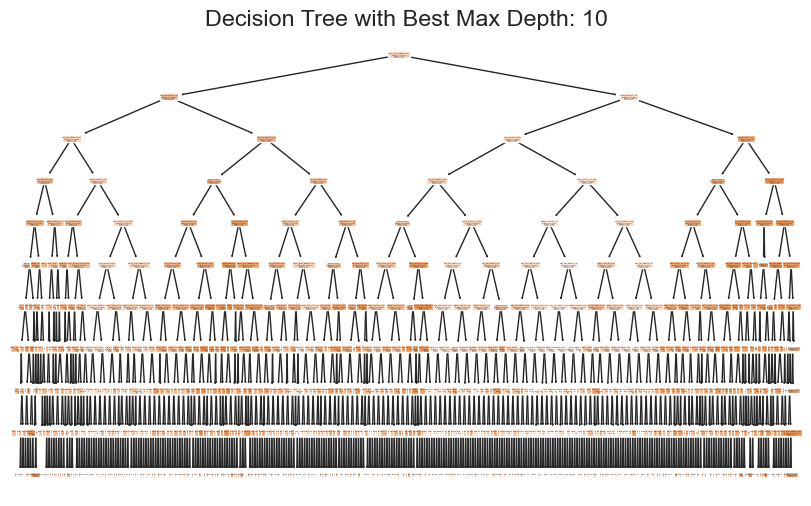

In [255]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
max_depth_values = [3, 5, 7, 10, None]

# Initialize lists to store RMSE and R-squared values for each depth
rmse_values = []
r_squared_values = []

for max_depth in max_depth_values:
    # Create a Decision Tree regression model with the current max_depth
    tree_reg_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    tree_reg_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_tree = tree_reg_model.predict(X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
    rmse_values.append(rmse)
    
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred_tree)
    r_squared_values.append(r_squared)
    
    print(f"Max Depth: {max_depth}, RMSE: {rmse}, R^2: {r_squared}")

# Find the index of the minimum RMSE value
best_index = rmse_values.index(min(rmse_values))

# Use the best index to get the corresponding max_depth value
best_max_depth = max_depth_values[best_index]

# Create and plot the decision tree for the best max_depth value
best_tree_reg_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_tree_reg_model.fit(X_train, y_train)

plot_tree(best_tree_reg_model, filled=True, feature_names=X.columns)
plt.title(f"Decision Tree with Best Max Depth: {best_max_depth}")
plt.show()


In [256]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb_fe1 = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb_fe1 = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (Feature Engineering 1): {rmse_xgb_fe1}")
print(f"R^2 score for XGBRegressor model (Feature Engineering 1): {r_squared_xgb_fe1}")


RMSE for XGBRegressor model (Feature Engineering 1): 4.433443112787221
R^2 score for XGBRegressor model (Feature Engineering 1): 0.7758230436041597


### Feature Engenerring (distance between restaurant location and delivery location)

In [257]:
train_df_2=train_df.copy()

from geopy.distance import geodesic

def calculate_distance(df):
    """
    Calculates the distance between restaurant location and delivery location.
    
    Parameters:
    - df (DataFrame): DataFrame containing columns 'Restaurant_latitude', 'Restaurant_longitude',
                      'Delivery_location_latitude', and 'Delivery_location_longitude'.
    
    Returns:
    None (Modifies the DataFrame in place by adding a new column 'distance').
    """
    # Calculate distance using geodesic function from geopy
    restaurant_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery).kilometers for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance'] = df['distance'].astype('int64')

# Call the function to calculate distance for the DataFrame 
calculate_distance(train_df_2)


In [258]:
train_df_2.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  float64       
 1   Delivery_person_Ratings      45593 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  45593 non-null  int32         
 8   Time_Order_picked            45593 non-null  int32         
 9   Weather_conditions           45593 non-null  int32         
 10  Road_traffic_density         45593 non-null  int32         
 11  Vehicle_condition            45593 non-nu

In [259]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(train_df_2)

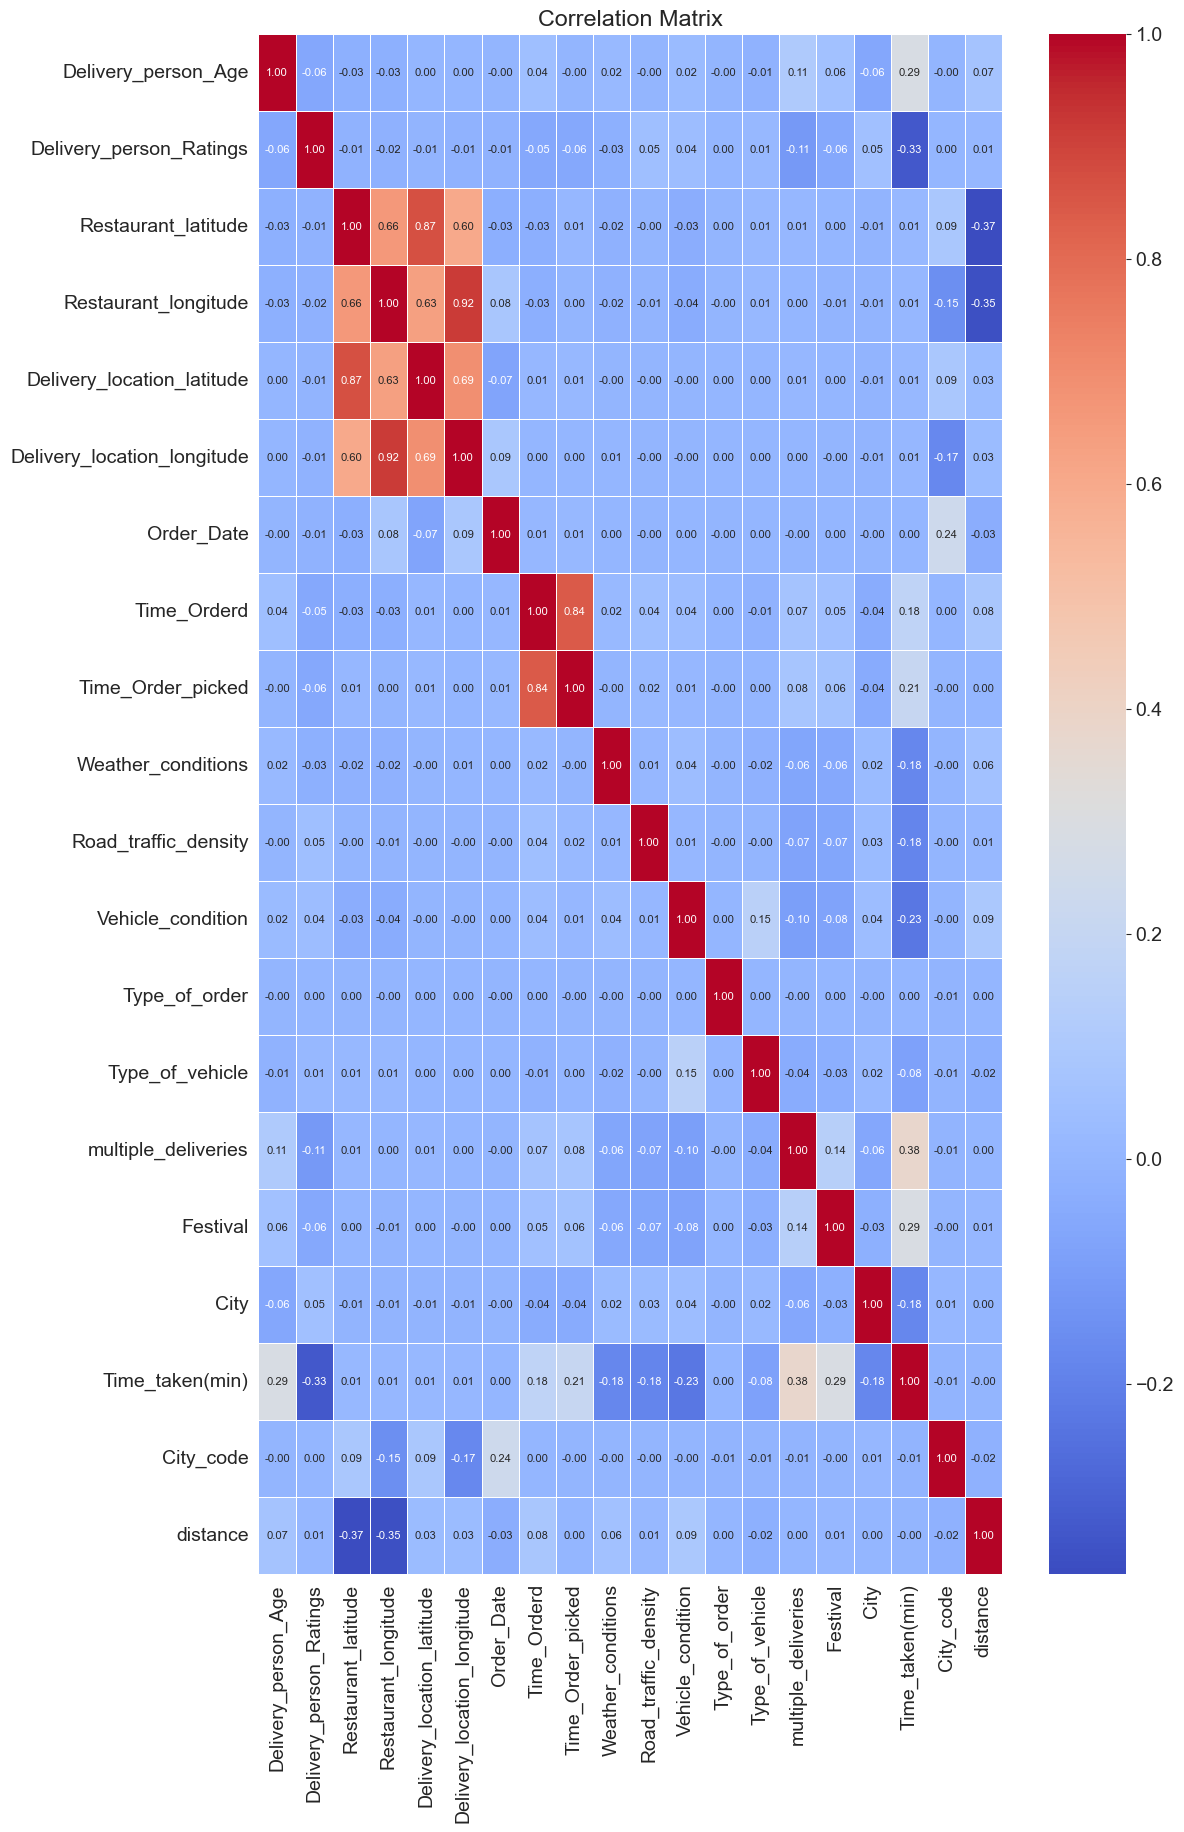

In [260]:
# Calculate the correlation matrix
correlation_matrix = train_df_2.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"fontsize": 8})  # Adjust font size for clarity
plt.title('Correlation Matrix')
plt.show()


#### Training

In [261]:
from sklearn.model_selection import train_test_split




# Split the data into features (X) and target variable (y)
X = train_df_2.drop(['Time_taken(min)', 'Order_Date'], axis=1)  # Features
y = train_df_2['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [262]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36474, 18)
Shape of X_test: (9119, 18)
Shape of y_train: (36474,)
Shape of y_test: (9119,)


In [263]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Original summary statistics for training data
original_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Original summary statistics for testing data
original_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Summary statistics for scaled training data
scaled_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Summary statistics for scaled testing data
scaled_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Display summary statistics before and after scaling
print("Original Summary Statistics for Training Data:")
original_summary_train




Original Summary Statistics for Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,distance
count,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000
mean,29.804491,4.636914,17.041501,70.235085,17.486201,70.867861,111.761063,118.884329,2.516560,1.734852,1.024045,1.515929,2.246779,0.749383,0.019630,0.448456,12.058370,100.014312
std,5.794815,0.328070,8.176420,22.893733,7.330215,21.067204,51.401341,56.983825,1.723271,0.933226,0.838474,1.120141,0.601767,0.566382,0.138728,0.831903,6.264574,1114.131430
min,15.000000,1.000000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,4.600000,12.933284,73.170000,12.989496,73.279083,86.000000,78.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,4.000000
50%,30.000000,4.700000,18.551440,75.897429,18.636947,75.996959,125.000000,135.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,11.000000,9.000000
75%,35.000000,4.800000,22.728163,78.044095,22.785747,78.101592,152.000000,164.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,18.000000,13.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,176.000000,192.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,21.000000,19704.000000


In [264]:
print("\nSummary Statistics for Scaled Training Data:")
scaled_summary_train


Summary Statistics for Scaled Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,distance
count,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04
mean,-2.337696e-17,5.236439e-16,1.511710e-16,5.513067e-16,-2.345488e-16,-3.549402e-16,-5.474105e-17,1.139627e-16,9.730660e-17,6.194895e-17,1.546776e-16,5.922164e-17,-2.579258e-16,2.376658e-17,-2.396139e-17,5.649432e-17,3.282515e-17,-5.844240e-19
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.554818e+00,-1.108595e+01,-5.864146e+00,-6.927230e+00,-2.384165e+00,-3.363466e+00,-2.174313e+00,-2.086311e+00,-1.460359e+00,-1.859009e+00,-1.221336e+00,-1.353356e+00,-3.733684e+00,-1.323124e+00,-1.415044e-01,-5.390804e-01,-1.924877e+00,-8.887252e-02
25%,-8.291131e-01,-1.125202e-01,-5.024537e-01,1.281990e-01,-6.134562e-01,1.144554e-01,-5.011818e-01,-7.174824e-01,-8.800593e-01,-7.874427e-01,-1.221336e+00,-4.605994e-01,-4.100952e-01,-1.323124e+00,-1.415044e-01,-5.390804e-01,-9.670974e-01,-8.617980e-02
50%,3.373910e-02,1.922972e-01,1.846725e-01,2.473350e-01,1.569889e-01,2.434670e-01,2.575637e-01,2.828152e-01,2.805403e-01,2.841233e-01,-2.867693e-02,4.321577e-01,-4.100952e-01,4.424936e-01,-1.415044e-01,-5.390804e-01,-1.689476e-01,-8.169194e-02
75%,8.965913e-01,4.971147e-01,6.955049e-01,3.411028e-01,7.229827e-01,3.433693e-01,7.828490e-01,7.917385e-01,8.608401e-01,2.841233e-01,1.163983e+00,1.324915e+00,1.251699e+00,4.424936e-01,-1.415044e-01,-5.390804e-01,9.484621e-01,-7.810165e-02
max,3.485148e+00,4.154924e+00,1.696677e+00,7.949169e-01,1.850975e+00,8.399707e-01,1.249769e+00,1.283113e+00,1.441140e+00,1.355689e+00,2.356642e+00,1.324915e+00,1.251699e+00,3.973729e+00,7.066919e+00,1.865079e+00,1.427352e+00,1.759600e+01


##### MODEL

###### Baseline (predicts mean)

In [265]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean of the target column
mean_target = y_train.mean()

# Predict using the mean value for all test samples
y_pred_baseline = np.full_like(y_test, mean_target)

# Calculate RMSE
rmse_baseline = sqrt(mean_squared_error(y_test, y_pred_baseline))


print(f"Mean of the target column: {mean_target}")
print(f"RMSE for baseline model: {rmse_baseline}")


Mean of the target column: 26.30161210725448
RMSE for baseline model: 9.363725943211962


In [266]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R^2 score for baseline model: {r2_baseline}")


R^2 score for baseline model: -1.3992208637070291e-05


In [267]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate RMSE
rmse_linear_reg = sqrt(mean_squared_error(y_test, y_pred_linear_reg))

# Calculate R-squared
r_squared_linear_reg = linear_reg_model.score(X_test, y_test)


print(f"RMSE for Linear Regression model: {rmse_linear_reg}")
print(f"R^2 score for Linear Regression model: {r_squared_linear_reg}")


RMSE for Linear Regression model: 6.9685317167676395
R^2 score for Linear Regression model: 0.44615116037649094


Max Depth: 3, RMSE: 7.297670554942055, R^2: 0.39259663223459174
Max Depth: 5, RMSE: 6.2769897399283225, R^2: 0.5506222911985774
Max Depth: 7, RMSE: 5.102188489282037, R^2: 0.7030921464414339
Max Depth: 10, RMSE: 4.102497217840522, R^2: 0.8080424145594202
Max Depth: None, RMSE: 5.533070580748156, R^2: 0.650826634851548


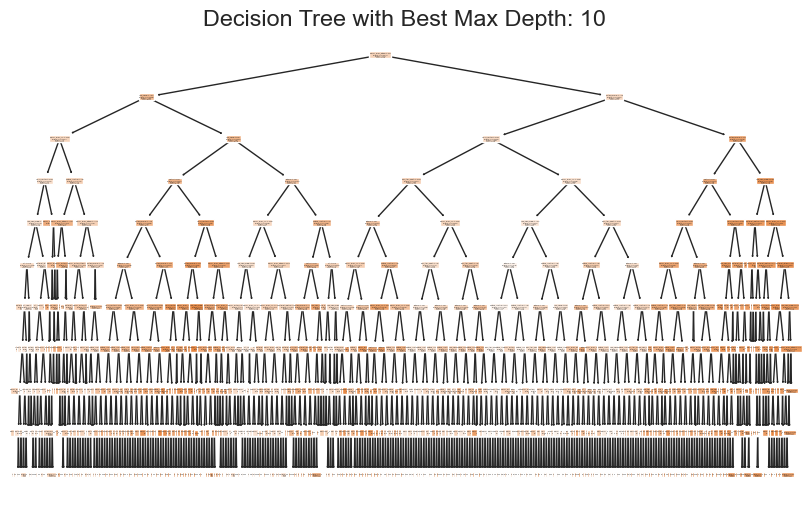

In [268]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
max_depth_values = [3, 5, 7, 10, None]

# Initialize lists to store RMSE and R-squared values for each depth
rmse_values = []
r_squared_values = []

for max_depth in max_depth_values:
    # Create a Decision Tree regression model with the current max_depth
    tree_reg_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    tree_reg_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_tree = tree_reg_model.predict(X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
    rmse_values.append(rmse)
    
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred_tree)
    r_squared_values.append(r_squared)
    
    print(f"Max Depth: {max_depth}, RMSE: {rmse}, R^2: {r_squared}")

# Find the index of the minimum RMSE value
best_index = rmse_values.index(min(rmse_values))

# Use the best index to get the corresponding max_depth value
best_max_depth = max_depth_values[best_index]

# Create and plot the decision tree for the best max_depth value
best_tree_reg_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_tree_reg_model.fit(X_train, y_train)

plot_tree(best_tree_reg_model, filled=True, feature_names=X.columns)
plt.title(f"Decision Tree with Best Max Depth: {best_max_depth}")
plt.show()


In [269]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb_fe2 = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb_fe2 = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (Feature Engineering 2): {rmse_xgb_fe2}")
print(f"R^2 score for XGBRegressor model (Feature Engineering 2): {r_squared_xgb_fe2}")


RMSE for XGBRegressor model (Feature Engineering 2): 4.033600340534348
R^2 score for XGBRegressor model (Feature Engineering 2): 0.8144357041084931


### Feature Engineering

In [270]:
import pandas as pd
import numpy as np

def extract_date_features(data):
    
    # Extract day of the month
    data["day"] = data.Order_Date.dt.day
    
    
    
    # Extract day of the week (0 for Monday, 1 for Tuesday, ..., 6 for Sunday)
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    
    
    # Indicates whether the date falls on a weekend (1 for True, 0 for False)
    # Saturday (5) and Sunday (6) are considered weekends
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]), 1, 0)

# Call the function to extract date features from the DataFrame 'df_train'
extract_date_features(train_df)

# Display the DataFrame to show the added features
train_df.head()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,day,day_of_week,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,38,46,4,...,3,2,0.0,0,2,24.0,10,19,5,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,129,143,3,...,3,3,1.0,0,0,33.0,3,25,4,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,5,10,2,...,1,2,1.0,0,2,26.0,3,19,5,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,110,123,4,...,0,2,1.0,0,0,21.0,6,5,1,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,60,70,0,...,3,3,1.0,0,0,30.0,5,26,5,1


In [271]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  float64       
 1   Delivery_person_Ratings      45593 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  45593 non-null  int32         
 8   Time_Order_picked            45593 non-null  int32         
 9   Weather_conditions           45593 non-null  int32         
 10  Road_traffic_density         45593 non-null  int32         
 11  Vehicle_condition            45593 non-nu

In [272]:
from geopy.distance import geodesic

def calculate_distance(df):
    """
    Calculates the distance between restaurant location and delivery location.
    
    Parameters:
    - df (DataFrame): DataFrame containing columns 'Restaurant_latitude', 'Restaurant_longitude',
                      'Delivery_location_latitude', and 'Delivery_location_longitude'.
    
    Returns:
    None (Modifies the DataFrame in place by adding a new column 'distance').
    """
    # Calculate distance using geodesic function from geopy
    restaurant_coordinates = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery).kilometers for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance'] = df['distance'].astype('int64')

# Call the function to calculate distance for the DataFrame 
calculate_distance(train_df)


In [273]:
train_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  float64       
 1   Delivery_person_Ratings      45593 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  45593 non-null  int32         
 8   Time_Order_picked            45593 non-null  int32         
 9   Weather_conditions           45593 non-null  int32         
 10  Road_traffic_density         45593 non-null  int32         
 11  Vehicle_condition            45593 non-nu

In [274]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(train_df)


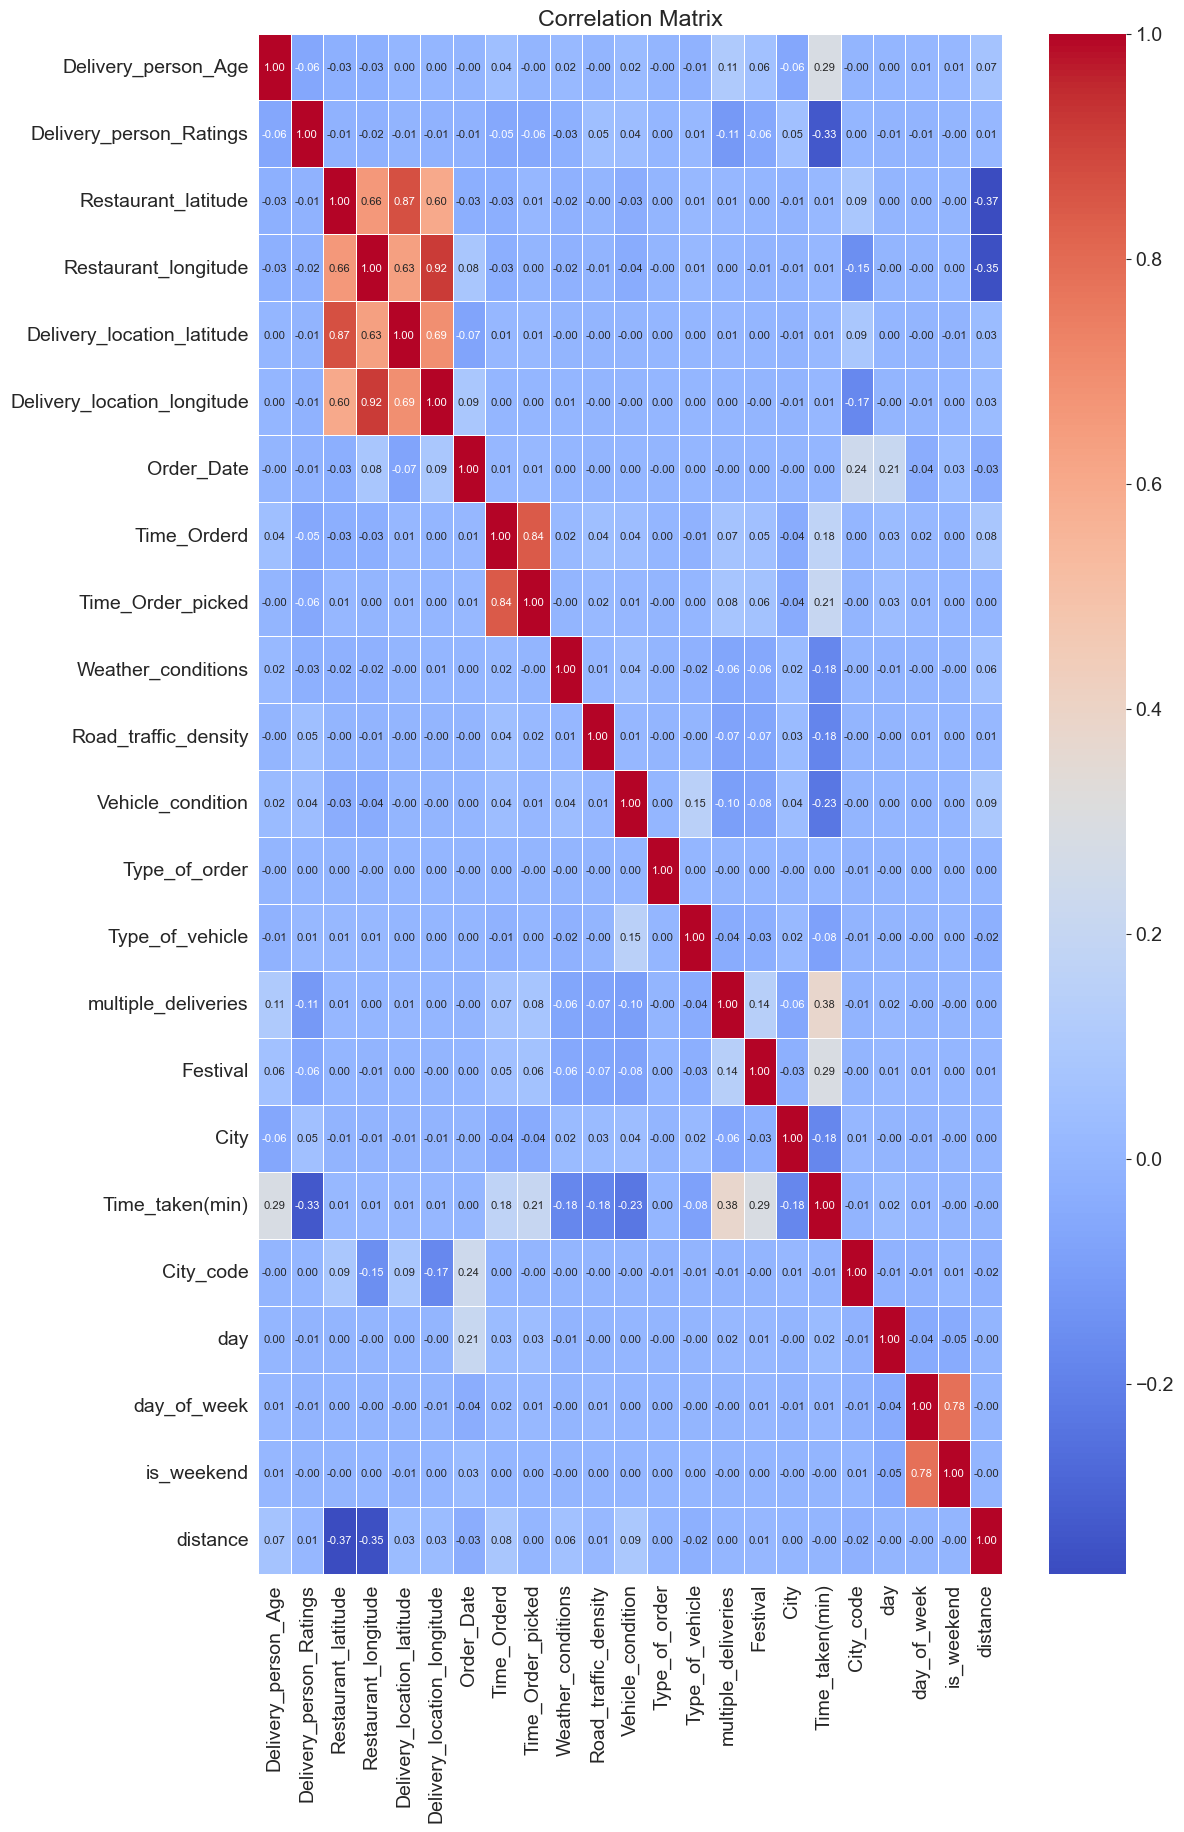

In [275]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            annot_kws={"fontsize": 8})  # Adjust font size for clarity
plt.title('Correlation Matrix')
plt.show()



In [276]:
from sklearn.model_selection import train_test_split




# Split the data into features (X) and target variable (y)
X = train_df.drop(['Time_taken(min)', 'Order_Date'], axis=1)  # Features
y = train_df['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [277]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36474, 21)
Shape of X_test: (9119, 21)
Shape of y_train: (36474,)
Shape of y_test: (9119,)


In [278]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Original summary statistics for training data
original_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Original summary statistics for testing data
original_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Summary statistics for scaled training data
scaled_summary_train = pd.DataFrame(X_train, columns=X.columns).describe()

# Summary statistics for scaled testing data
scaled_summary_test = pd.DataFrame(X_test, columns=X.columns).describe()

# Display summary statistics before and after scaling
print("Original Summary Statistics for Training Data:")
original_summary_train




Original Summary Statistics for Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,day,day_of_week,is_weekend,distance
count,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,...,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000,36474.000000
mean,29.804491,4.636914,17.041501,70.235085,17.486201,70.867861,111.761063,118.884329,2.516560,1.734852,...,1.515929,2.246779,0.749383,0.019630,0.448456,12.058370,13.828508,3.006553,0.275319,100.014312
std,5.794815,0.328070,8.176420,22.893733,7.330215,21.067204,51.401341,56.983825,1.723271,0.933226,...,1.120141,0.601767,0.566382,0.138728,0.831903,6.264574,8.698880,1.967712,0.446681,1114.131430
min,15.000000,1.000000,-30.905562,-88.352885,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25.000000,4.600000,12.933284,73.170000,12.989496,73.279083,86.000000,78.000000,1.000000,1.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000,6.000000,1.000000,0.000000,4.000000
50%,30.000000,4.700000,18.551440,75.897429,18.636947,75.996959,125.000000,135.000000,3.000000,2.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,11.000000,13.000000,3.000000,0.000000,9.000000
75%,35.000000,4.800000,22.728163,78.044095,22.785747,78.101592,152.000000,164.000000,4.000000,2.000000,...,3.000000,3.000000,1.000000,0.000000,0.000000,18.000000,20.000000,5.000000,1.000000,13.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,176.000000,192.000000,5.000000,3.000000,...,3.000000,3.000000,3.000000,1.000000,2.000000,21.000000,31.000000,6.000000,1.000000,19704.000000


In [279]:
print("\nSummary Statistics for Scaled Training Data:")
scaled_summary_train



Summary Statistics for Scaled Training Data:


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,day,day_of_week,is_weekend,distance
count,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,...,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04,3.647400e+04
mean,-2.337696e-17,5.236439e-16,1.511710e-16,5.513067e-16,-2.345488e-16,-3.549402e-16,-5.474105e-17,1.139627e-16,9.730660e-17,6.194895e-17,...,5.922164e-17,-2.579258e-16,2.376658e-17,-2.396139e-17,5.649432e-17,3.282515e-17,1.777623e-17,-1.022742e-16,-3.662391e-17,-5.844240e-19
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.554818e+00,-1.108595e+01,-5.864146e+00,-6.927230e+00,-2.384165e+00,-3.363466e+00,-2.174313e+00,-2.086311e+00,-1.460359e+00,-1.859009e+00,...,-1.353356e+00,-3.733684e+00,-1.323124e+00,-1.415044e-01,-5.390804e-01,-1.924877e+00,-1.474751e+00,-1.527965e+00,-6.163751e-01,-8.887252e-02
25%,-8.291131e-01,-1.125202e-01,-5.024537e-01,1.281990e-01,-6.134562e-01,1.144554e-01,-5.011818e-01,-7.174824e-01,-8.800593e-01,-7.874427e-01,...,-4.605994e-01,-4.100952e-01,-1.323124e+00,-1.415044e-01,-5.390804e-01,-9.670974e-01,-8.999567e-01,-1.019753e+00,-6.163751e-01,-8.617980e-02
50%,3.373910e-02,1.922972e-01,1.846725e-01,2.473350e-01,1.569889e-01,2.434670e-01,2.575637e-01,2.828152e-01,2.805403e-01,2.841233e-01,...,4.321577e-01,-4.100952e-01,4.424936e-01,-1.415044e-01,-5.390804e-01,-1.689476e-01,-9.524437e-02,-3.330113e-03,-6.163751e-01,-8.169194e-02
75%,8.965913e-01,4.971147e-01,6.955049e-01,3.411028e-01,7.229827e-01,3.433693e-01,7.828490e-01,7.917385e-01,8.608401e-01,2.841233e-01,...,1.324915e+00,1.251699e+00,4.424936e-01,-1.415044e-01,-5.390804e-01,9.484621e-01,7.094680e-01,1.013093e+00,1.622389e+00,-7.810165e-02
max,3.485148e+00,4.154924e+00,1.696677e+00,7.949169e-01,1.850975e+00,8.399707e-01,1.249769e+00,1.283113e+00,1.441140e+00,1.355689e+00,...,1.324915e+00,1.251699e+00,3.973729e+00,7.066919e+00,1.865079e+00,1.427352e+00,1.974016e+00,1.521304e+00,1.622389e+00,1.759600e+01


In [280]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate the mean of the target column
mean_target = y_train.mean()

# Predict using the mean value for all test samples
y_pred_baseline = np.full_like(y_test, mean_target)

# Calculate RMSE
rmse_baseline = sqrt(mean_squared_error(y_test, y_pred_baseline))


print(f"Mean of the target column: {mean_target}")
print(f"RMSE for baseline model: {rmse_baseline}")


Mean of the target column: 26.30161210725448
RMSE for baseline model: 9.363725943211962


In [281]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2_baseline = r2_score(y_test, y_pred_baseline)
print(f"R^2 score for baseline model: {r2_baseline}")


R^2 score for baseline model: -1.3992208637070291e-05


In [282]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Calculate RMSE
rmse_linear_reg = sqrt(mean_squared_error(y_test, y_pred_linear_reg))

# Calculate R-squared
r_squared_linear_reg = linear_reg_model.score(X_test, y_test)


print(f"RMSE for Linear Regression model: {rmse_linear_reg}")
print(f"R^2 score for Linear Regression model: {r_squared_linear_reg}")


RMSE for Linear Regression model: 6.968015620141346
R^2 score for Linear Regression model: 0.44623319456803634


Max Depth: 3, RMSE: 7.297670554942055, R^2: 0.39259663223459174
Max Depth: 5, RMSE: 6.2769897399283225, R^2: 0.5506222911985774
Max Depth: 7, RMSE: 5.102745773861651, R^2: 0.703027283606604
Max Depth: 10, RMSE: 4.118894070185001, R^2: 0.8065049167972025
Max Depth: None, RMSE: 5.590015459453925, R^2: 0.6436024532137431


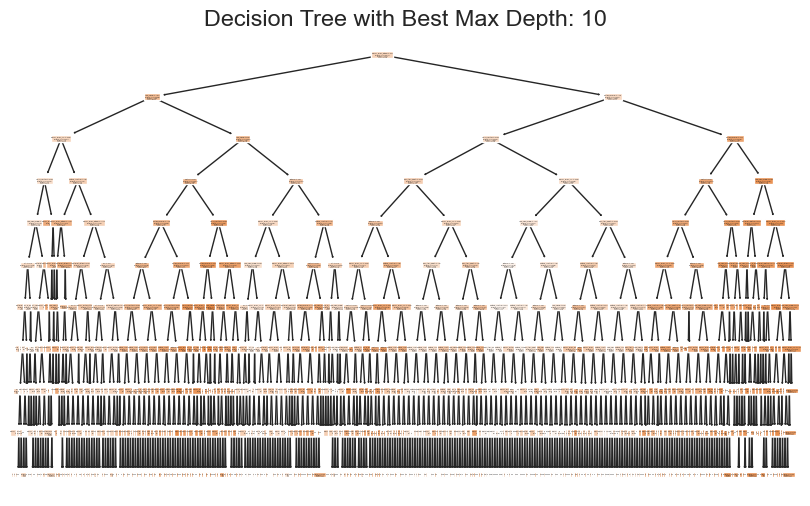

In [283]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define a range of max_depth values to explore
max_depth_values = [3, 5, 7, 10, None]

# Initialize lists to store RMSE and R-squared values for each depth
rmse_values = []
r_squared_values = []

for max_depth in max_depth_values:
    # Create a Decision Tree regression model with the current max_depth
    tree_reg_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Fit the model on the training data
    tree_reg_model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_tree = tree_reg_model.predict(X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
    rmse_values.append(rmse)
    
    # Calculate R-squared
    r_squared = r2_score(y_test, y_pred_tree)
    r_squared_values.append(r_squared)
    
    print(f"Max Depth: {max_depth}, RMSE: {rmse}, R^2: {r_squared}")

# Find the index of the minimum RMSE value
best_index = rmse_values.index(min(rmse_values))

# Use the best index to get the corresponding max_depth value
best_max_depth = max_depth_values[best_index]

# Create and plot the decision tree for the best max_depth value
best_tree_reg_model = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_tree_reg_model.fit(X_train, y_train)

plot_tree(best_tree_reg_model, filled=True, feature_names=X.columns)
plt.title(f"Decision Tree with Best Max Depth: {best_max_depth}")
plt.show()


In [284]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb_fe3 = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb_fe3 = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (Feature Engineering 3): {rmse_xgb_fe3}")
print(f"R^2 score for XGBRegressor model (Feature Engineering 3): {r_squared_xgb_fe3}")


RMSE for XGBRegressor model (Feature Engineering 3): 4.070152790271644
R^2 score for XGBRegressor model (Feature Engineering 3): 0.8110573016920108


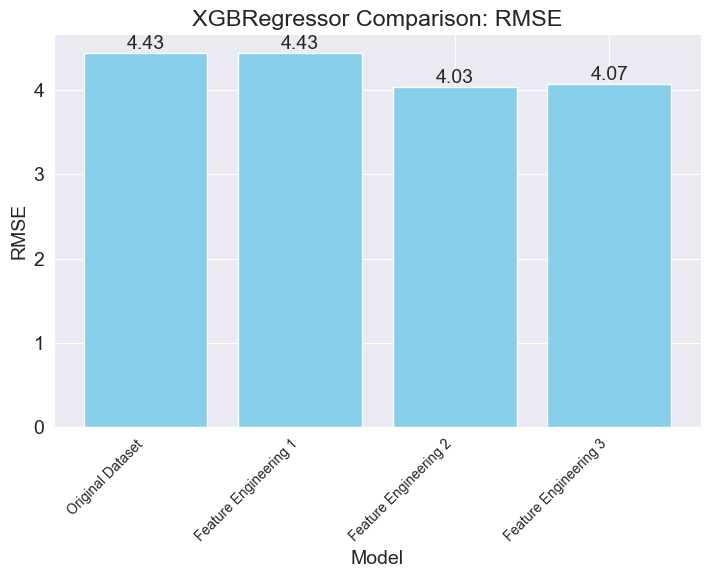

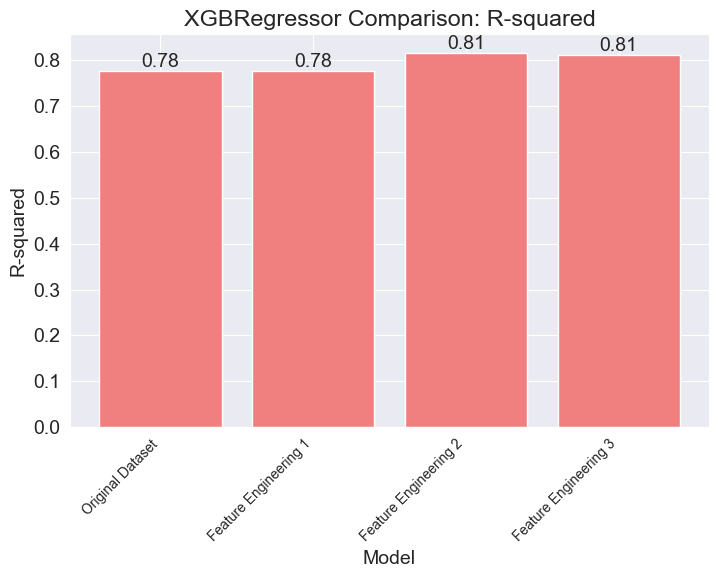

In [285]:
import matplotlib.pyplot as plt

# Model names
model_names = [
    'Original Dataset',
    'Feature Engineering 1',
    'Feature Engineering 2',
    'Feature Engineering 3'
]

# RMSE values
rmse_values = [
    rmse_xgb_original,
    rmse_xgb_fe1,
    rmse_xgb_fe2,
    rmse_xgb_fe3
]

# R-squared values
r_squared_values = [
    r_squared_xgb_original,
    r_squared_xgb_fe1,
    r_squared_xgb_fe2,
    r_squared_xgb_fe3
]

# Ensure that lengths of all lists match
assert len(model_names) == len(rmse_values) == len(r_squared_values), "Length mismatch between model names and values."

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('XGBRegressor Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting the R-squared comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('XGBRegressor Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [286]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming train_df is your original DataFrame

# Create a copy of train_df
train_df_copy = train_df.copy()

# Select only the 'Weather_conditions' feature and the target variable
X = train_df_copy[['Weather_conditions']]  # Features (only Weather_conditions)
y = train_df_copy['Time_taken(min)']  # Target variable

# Convert categorical feature to numerical (if needed)
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (using only Weather_conditions): {rmse_xgb}")
print(f"R^2 score for XGBRegressor model (using only Weather_conditions): {r_squared_xgb}")

# Store these values for later use in the comparison plot
rmse_xgb_weather = rmse_xgb
r_squared_xgb_weather = r_squared_xgb


RMSE for XGBRegressor model (using only Weather_conditions): 9.063726451037905
R^2 score for XGBRegressor model (using only Weather_conditions): 0.06303737460400594


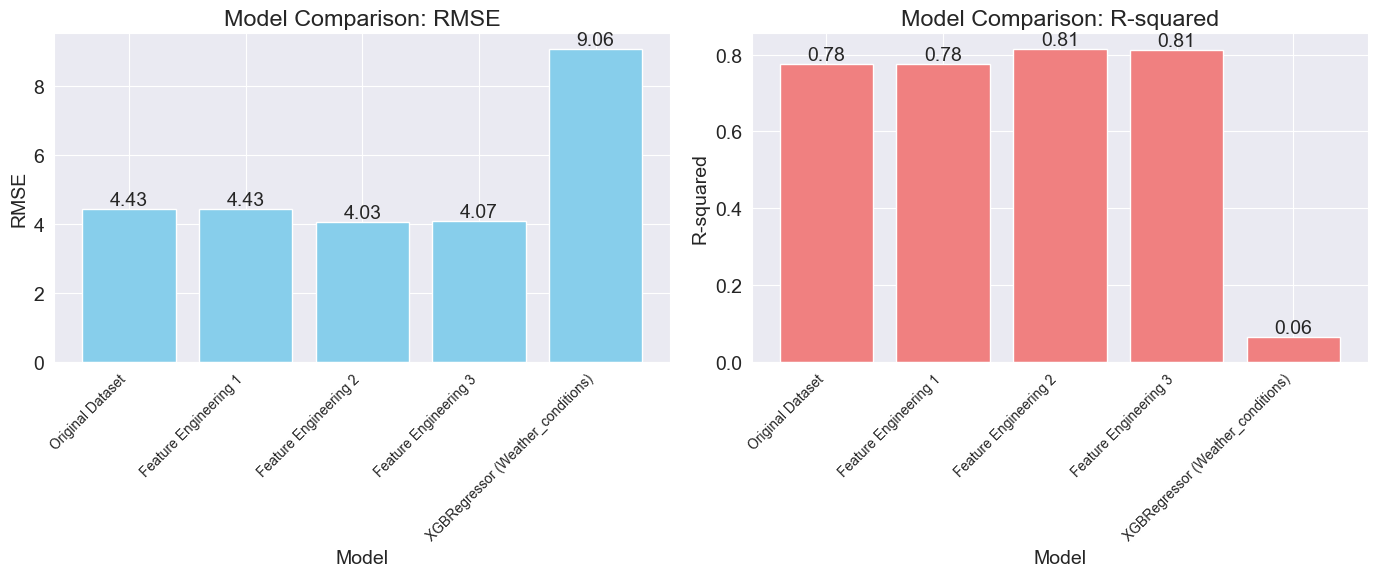

In [287]:
# Assuming you've stored the other RMSE and R-squared values in lists

# Add the filtered data results to your lists
model_names.append('XGBRegressor (Weather_conditions)')
rmse_values.append(rmse_xgb_weather)
r_squared_values.append(r_squared_xgb_weather)

# Ensure that lengths of all lists match
assert len(model_names) == len(rmse_values) == len(r_squared_values), "Length mismatch between model names and values."

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plotting the R-squared comparison
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [288]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming train_df is your original DataFrame

# Create a copy of train_df
train_df_copy = train_df.copy()

# Select only the 'distance' feature and the target variable
X = train_df_copy[['distance']]  # Features (only distance)
y = train_df_copy['Time_taken(min)']  # Target variable

# Convert categorical feature to numerical (if needed)
# If 'distance' is already numerical, this step is not needed

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (using only distance): {rmse_xgb}")
print(f"R^2 score for XGBRegressor model (using only distance): {r_squared_xgb}")

# Store these values for later use in the comparison plot
rmse_xgb_distance = rmse_xgb
r_squared_xgb_distance = r_squared_xgb


RMSE for XGBRegressor model (using only distance): 8.731991855725097
R^2 score for XGBRegressor model (using only distance): 0.13036836076598413


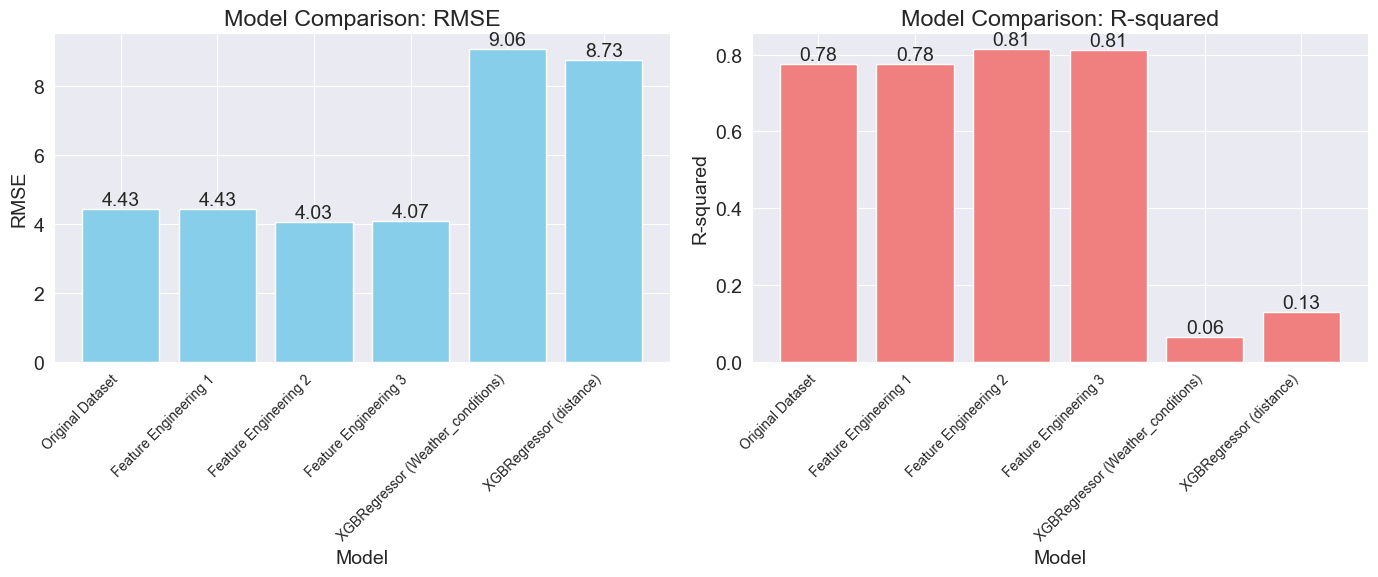

In [289]:
# Assuming you've stored the other RMSE and R-squared values in lists

# Add the filtered data results to your lists
model_names.append('XGBRegressor (distance)')
rmse_values.append(rmse_xgb_distance)
r_squared_values.append(r_squared_xgb_distance)

# Ensure that lengths of all lists match
assert len(model_names) == len(rmse_values) == len(r_squared_values), "Length mismatch between model names and values."

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plotting the R-squared comparison
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [290]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming train_df is your original DataFrame

# Create a copy of train_df
train_df_copy = train_df.copy()

# Select the 'Weather_conditions' and 'distance' features and the target variable
X = train_df_copy[['Weather_conditions', 'distance']]  # Features (Weather_conditions and distance)
y = train_df_copy['Time_taken(min)']  # Target variable

# Convert categorical feature to numerical (if needed)
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data using the XGBRegressor model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the XGBRegressor model
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))

# Calculate R-squared for the XGBRegressor model
r_squared_xgb = r2_score(y_test, y_pred_xgb)

print(f"RMSE for XGBRegressor model (using Weather_conditions and distance): {rmse_xgb}")
print(f"R^2 score for XGBRegressor model (using Weather_conditions and distance): {r_squared_xgb}")

# Store these values for later use in the comparison plot
rmse_xgb_weather_distance = rmse_xgb
r_squared_xgb_weather_distance = r_squared_xgb


RMSE for XGBRegressor model (using Weather_conditions and distance): 8.005794037922062
R^2 score for XGBRegressor model (using Weather_conditions and distance): 0.2689997692825451


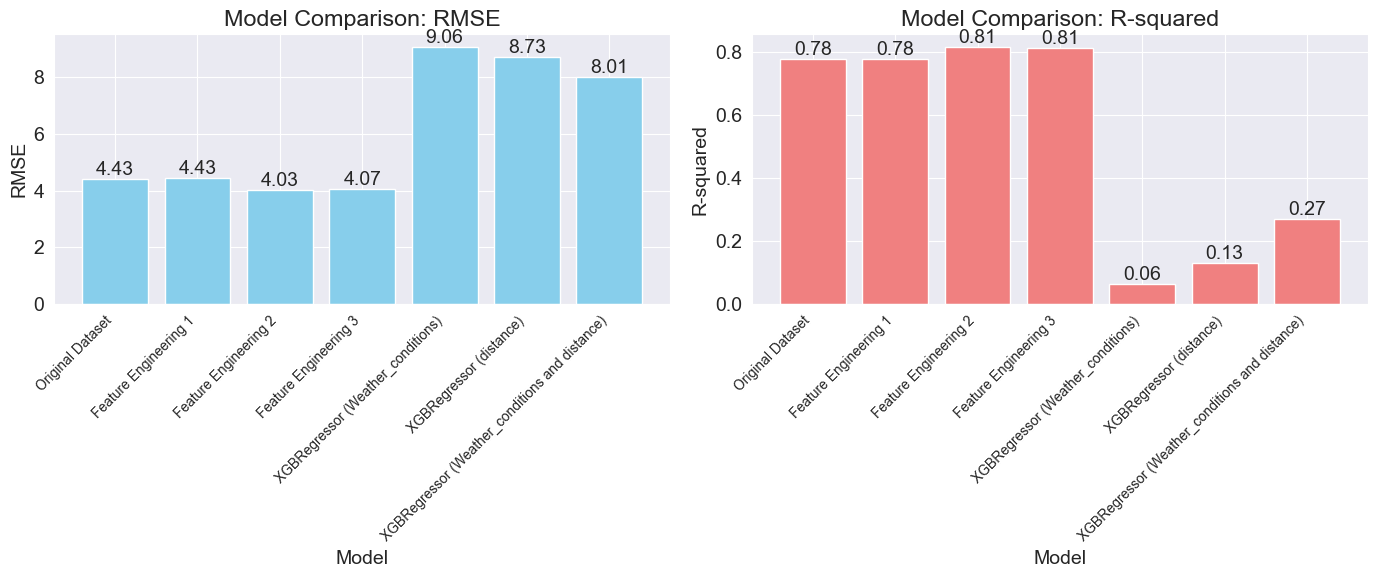

In [291]:
# Assuming you've stored the other RMSE and R-squared values in lists

# Add the filtered data results to your lists
model_names.append('XGBRegressor (Weather_conditions and distance)')
rmse_values.append(rmse_xgb_weather_distance)
r_squared_values.append(r_squared_xgb_weather_distance)

# Ensure that lengths of all lists match
assert len(model_names) == len(rmse_values) == len(r_squared_values), "Length mismatch between model names and values."

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plotting the R-squared comparison
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [292]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# Assuming train_df is your original DataFrame

# List of features to evaluate
features = [
    'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 
    'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 
    'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 
    'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'City_code', 
    'day', 'day_of_week', 'is_weekend', 'distance'
]

# Store results
rmse_values = []
r_squared_values = []
model_names = []

for feature in features:
    # Select the current feature and the target variable
    X = train_df[[feature]]
    y = train_df['Time_taken(min)']
    
    # Convert categorical feature to numerical (if needed)
    if X[feature].dtype == 'object' or X[feature].dtype.name == 'category':
        X = pd.get_dummies(X, drop_first=True)
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the XGBRegressor model
    xgb_model = xgb.XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Predict on the test data using the XGBRegressor model
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate RMSE for the XGBRegressor model
    rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
    
    # Calculate R-squared for the XGBRegressor model
    r_squared_xgb = r2_score(y_test, y_pred_xgb)
    
    # Store results
    rmse_values.append(rmse_xgb)
    r_squared_values.append(r_squared_xgb)
    model_names.append(feature)

    print(f"RMSE for XGBRegressor model (using {feature}): {rmse_xgb}")
    print(f"R^2 score for XGBRegressor model (using {feature}): {r_squared_xgb}")


RMSE for XGBRegressor model (using Delivery_person_Age): 8.822954213918415
R^2 score for XGBRegressor model (using Delivery_person_Age): 0.11215584676844625
RMSE for XGBRegressor model (using Delivery_person_Ratings): 8.470403345547044
R^2 score for XGBRegressor model (using Delivery_person_Ratings): 0.18169186169887752
RMSE for XGBRegressor model (using Restaurant_latitude): 9.385263075487389
R^2 score for XGBRegressor model (using Restaurant_latitude): -0.004619467092019658
RMSE for XGBRegressor model (using Restaurant_longitude): 9.388766351177342
R^2 score for XGBRegressor model (using Restaurant_longitude): -0.005369603937380951
RMSE for XGBRegressor model (using Delivery_location_latitude): 9.021372235326506
R^2 score for XGBRegressor model (using Delivery_location_latitude): 0.07177364797274244
RMSE for XGBRegressor model (using Delivery_location_longitude): 9.057299745452442
R^2 score for XGBRegressor model (using Delivery_location_longitude): 0.06436562477692598
RMSE for XGBRe

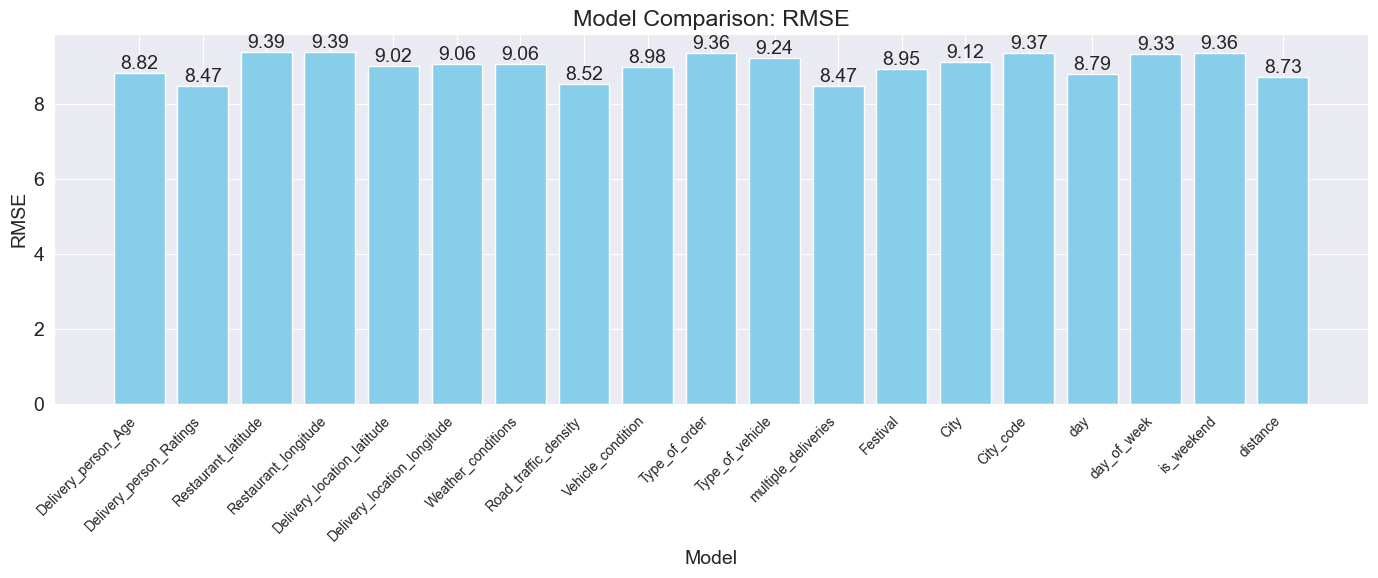

In [294]:
import matplotlib.pyplot as plt

# Plotting the RMSE comparison
plt.figure(figsize=(14, 6))
bars_rmse = plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for RMSE
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


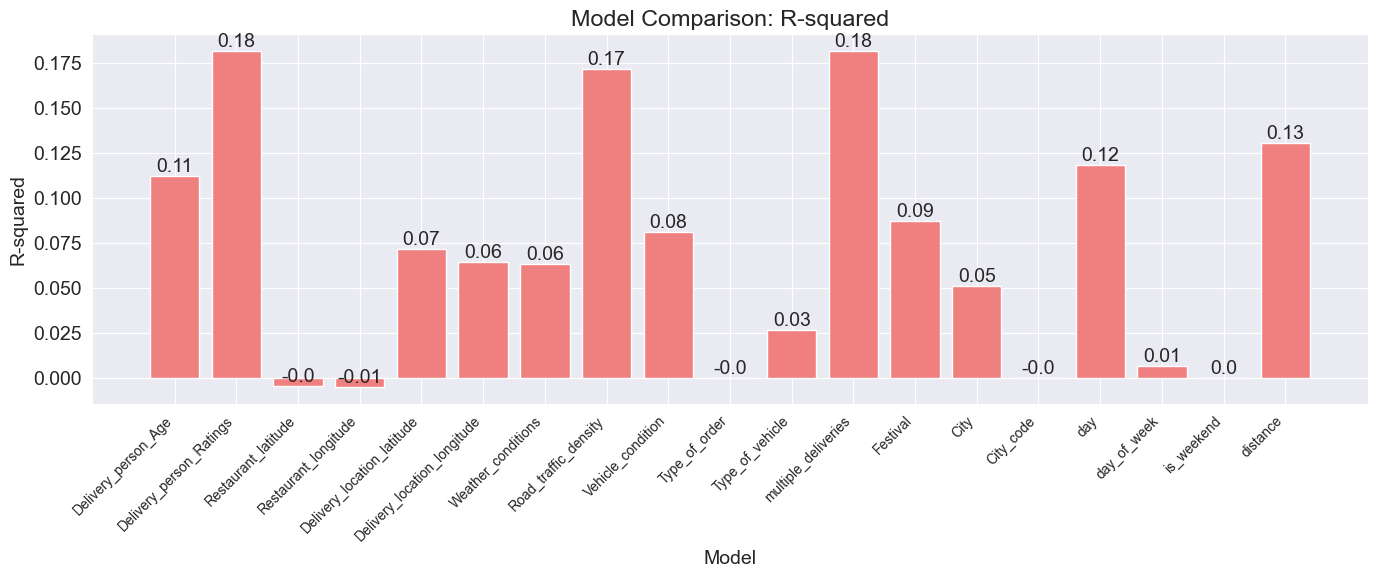

In [295]:
# Plotting the R-squared comparison
plt.figure(figsize=(14, 6))
bars_r2 = plt.bar(model_names, r_squared_values, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust fontsize as needed

# Add text labels on the bars for R-squared
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
